In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
from itertools import islice

df = pd.read_csv('clean_data_v2.csv')


In [5]:
# Print first 100 rows of df
df.head(1000)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,notes,participant_age,participant_average_age,participant_age_group,participant_gender,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,Julian Sims under investigation: Four Shot and...,0::20,20.00,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,0::Unknown,0::Unknown
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,Four Shot; One Killed; Unidentified shooter in...,0::20,20.00,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62,35
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::Unknown,0::25||1::31||2::33||3::34||4::33,31.20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56,13
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::Unknown,0::29||1::33||2::56||3::33,37.75,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40,28
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,Two firearms recovered. (Attempted) murder sui...,0::18||1::46||2::14||3::47,31.25,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62,27
5,478948,2013-01-07,Oklahoma,Tulsa,6000 block of South Owasso,4,0,http://www.gunviolencearchive.org/incident/478948,http://usnews.nbcnews.com/_news/2013/01/07/163...,False,...,0::Unknown,0::23||1::23||2::33||3::55,33.50,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Female||2::Female||3::Female||4:...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.kjrh.com/news/local-news/4-found-sh...,72,11
6,479363,2013-01-19,New Mexico,Albuquerque,2806 Long Lane,5,0,http://www.gunviolencearchive.org/incident/479363,http://hinterlandgazette.com/2013/01/pastor-gr...,False,...,0::Unknown,0::51||1::40||2::9||3::5||4::2||5::15,20.33,0::Adult 18+||1::Adult 18+||2::Child 0-11||3::...,0::Male||1::Female||2::Male||3::Female||4::Fem...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/nehemiah-gringo-ca...,10,14
7,479374,2013-01-21,Louisiana,New Orleans,LaSalle Street and Martin Luther King Jr. Boul...,0,5,http://www.gunviolencearchive.org/incident/479374,http://www.nola.com/crime/index.ssf/2013/01/no...,False,...,Unprovoked drive-by results in multiple teens ...,0::Unknown,NaN,0::Unknown,0::Male||1::Male||2::Male||3::Male||4::Male

In [6]:
print("Average Injured: {}".format(round(df["n_injured"].mean(),2)))
print("Average Killed: {}".format(round(df["n_killed"].mean(),2)))
print("Average Age of Participants: {}".format(round(df["participant_average_age"].mean(),2)))

Average Injured: 0.49
Average Killed: 0.25
Average Age of Participants: 30.0


In [7]:
# All unique state values
States = df["state"].values

# Removing duplicates and sorting list
States = sorted(list(set(States)))

In [123]:
for statename in States:
    print("Averages in {} per case:".format(statename))
    print("Total number of cases: {}".format(df[df['state'] == statename]['state'].count()))
    print("Injured: {}".format(round(df[df['state'] == statename]["n_injured"].mean(),2)))
    print("Killed: {}".format(round(df[df['state'] == statename]["n_killed"].mean(),2)))
    print("Age: {}".format(round(df[df['state'] == statename]["participant_average_age"].mean(),2)))
    print()

Averages in Alabama per case:
Total number of cases: 5471
Injured: 0.55
Killed: 0.34
Age: 31.02

Averages in Alaska per case:
Total number of cases: 1349
Injured: 0.24
Killed: 0.2
Age: 31.99

Averages in Arizona per case:
Total number of cases: 2328
Injured: 0.47
Killed: 0.47
Age: 32.36

Averages in Arkansas per case:
Total number of cases: 2842
Injured: 0.47
Killed: 0.27
Age: 31.69

Averages in California per case:
Total number of cases: 16306
Injured: 0.47
Killed: 0.34
Age: 30.76

Averages in Colorado per case:
Total number of cases: 3201
Injured: 0.35
Killed: 0.25
Age: 32.12

Averages in Connecticut per case:
Total number of cases: 3067
Injured: 0.41
Killed: 0.11
Age: 29.67

Averages in Delaware per case:
Total number of cases: 1685
Injured: 0.51
Killed: 0.13
Age: 27.55

Averages in District of Columbia per case:
Total number of cases: 3195
Injured: 0.44
Killed: 0.14
Age: 27.92

Averages in Florida per case:
Total number of cases: 15029
Injured: 0.47
Killed: 0.26
Age: 30.85

Average

In [9]:
incident_char = df["incident_characteristics"].values
incident_char = list(set(incident_char))

In [10]:
# converts a csv dictionary to a list in python

def csv_dict_to_py_list(csv_string):
    if '::' in csv_string:
        py_dict = dict((key, value) for key, value in (item.split('::') for item in csv_string.split('||')))
    elif ':' in csv_string:
        py_dict = dict((key, value) for key, value in (item.split(':') for item in csv_string.split('|')))
    return list(py_dict.values())

Males involved in gunviolence: 309090
Females involved in gunviolence: 43172


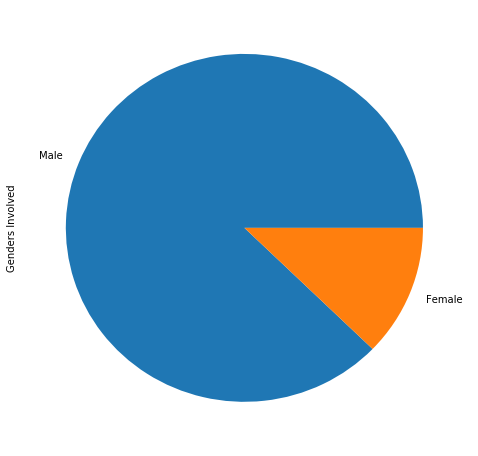

In [11]:
# dropna skips empty values

participant_genders = df["participant_gender"].dropna()


male = 0
female = 0 

for participant_gender in participant_genders:
    participant_gender_list =  csv_dict_to_py_list(participant_gender)
    male += participant_gender_list.count("Male")
    female += participant_gender_list.count("Female")

print("Males involved in gunviolence: {}".format(male))
print("Females involved in gunviolence: {}".format(female))

series = pd.Series([male, female], index=['Male', 'Female'], name='Genders Involved')

series.plot.pie(figsize=(8, 8))

Suspects involved in gunviolence: 199263
Victims involved in gunviolence: 193060
Unknown involved in gunviolence: 24863


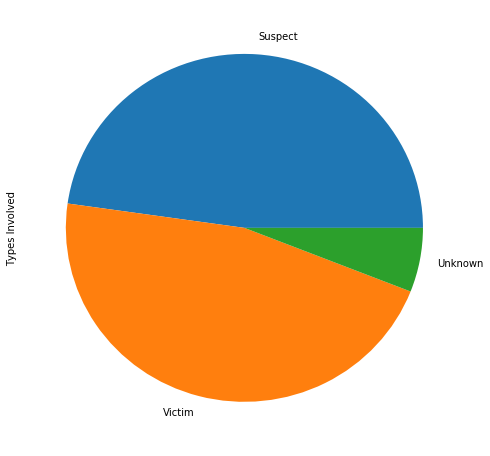

In [12]:
# dropna skips empty values

participant_type = df["participant_type"].dropna()


suspect = 0
victim = 0 
unknown = 0


for participant in participant_type:
    participant_list =  csv_dict_to_py_list(participant)
    suspect += participant_list.count("Subject-Suspect")
    victim += participant_list.count("Victim")
    unknown += participant_list.count("Unknown")

print("Suspects involved in gunviolence: {}".format(suspect))
print("Victims involved in gunviolence: {}".format(victim))
print("Unknown involved in gunviolence: {}".format(unknown))

series = pd.Series([suspect, victim, unknown], index=['Suspect', 'Victim', 'Unknown'], name='Types Involved')

series.plot.pie(figsize=(8, 8))

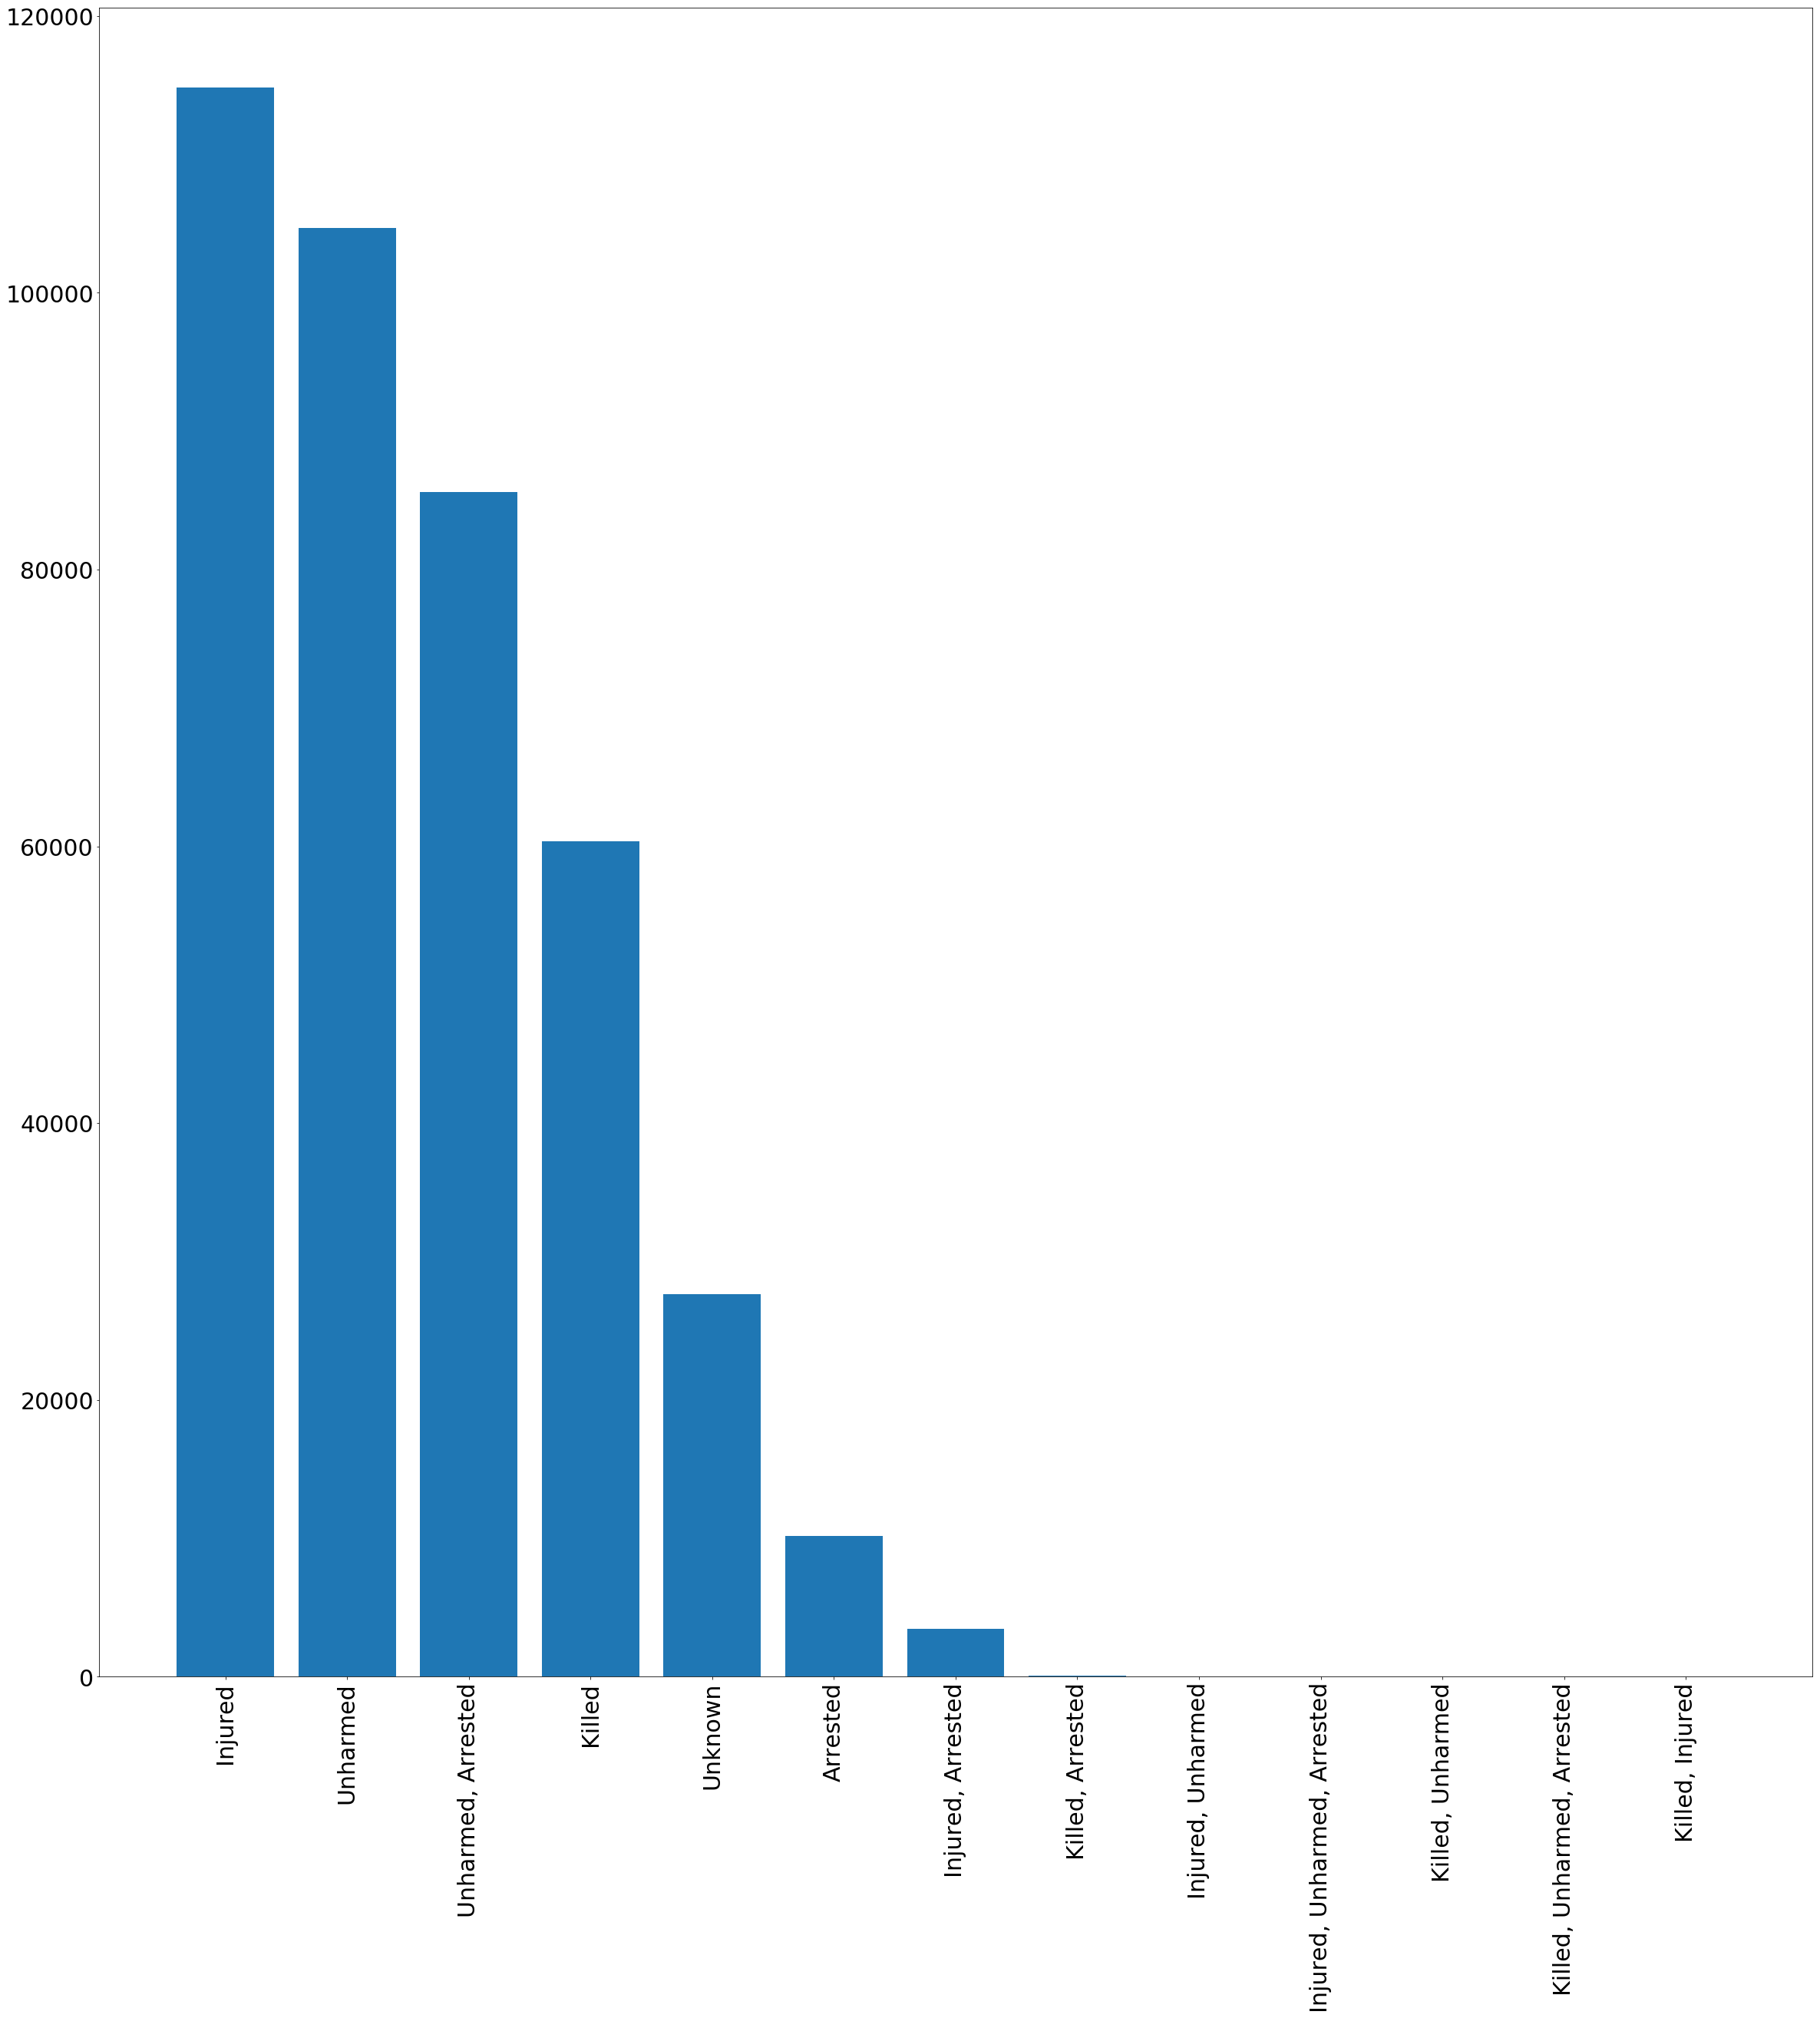

In [13]:
# dropna skips empty values
participant_status = df["participant_status"].dropna()

# empty list gun types
participant_list = [] 

# add all gun types to the list gun_types
for status in participant_status:
    status = csv_dict_to_py_list(status)
    participant_list.extend(status)

# count occurences in dictionary
D = dict((x,participant_list.count(x)) for x in set(participant_list))

# sort the dictionary by value size
D = dict(reversed(sorted(D.items(), key=operator.itemgetter(1))))

# plot figure
plt.figure(figsize=(40,40))
plt.bar(range(len(D)), list(D.values()), align='center')
plt.yticks(size=30)
plt.xticks(range(len(D)), list(D.keys()), rotation='vertical',size=30)
plt.show()

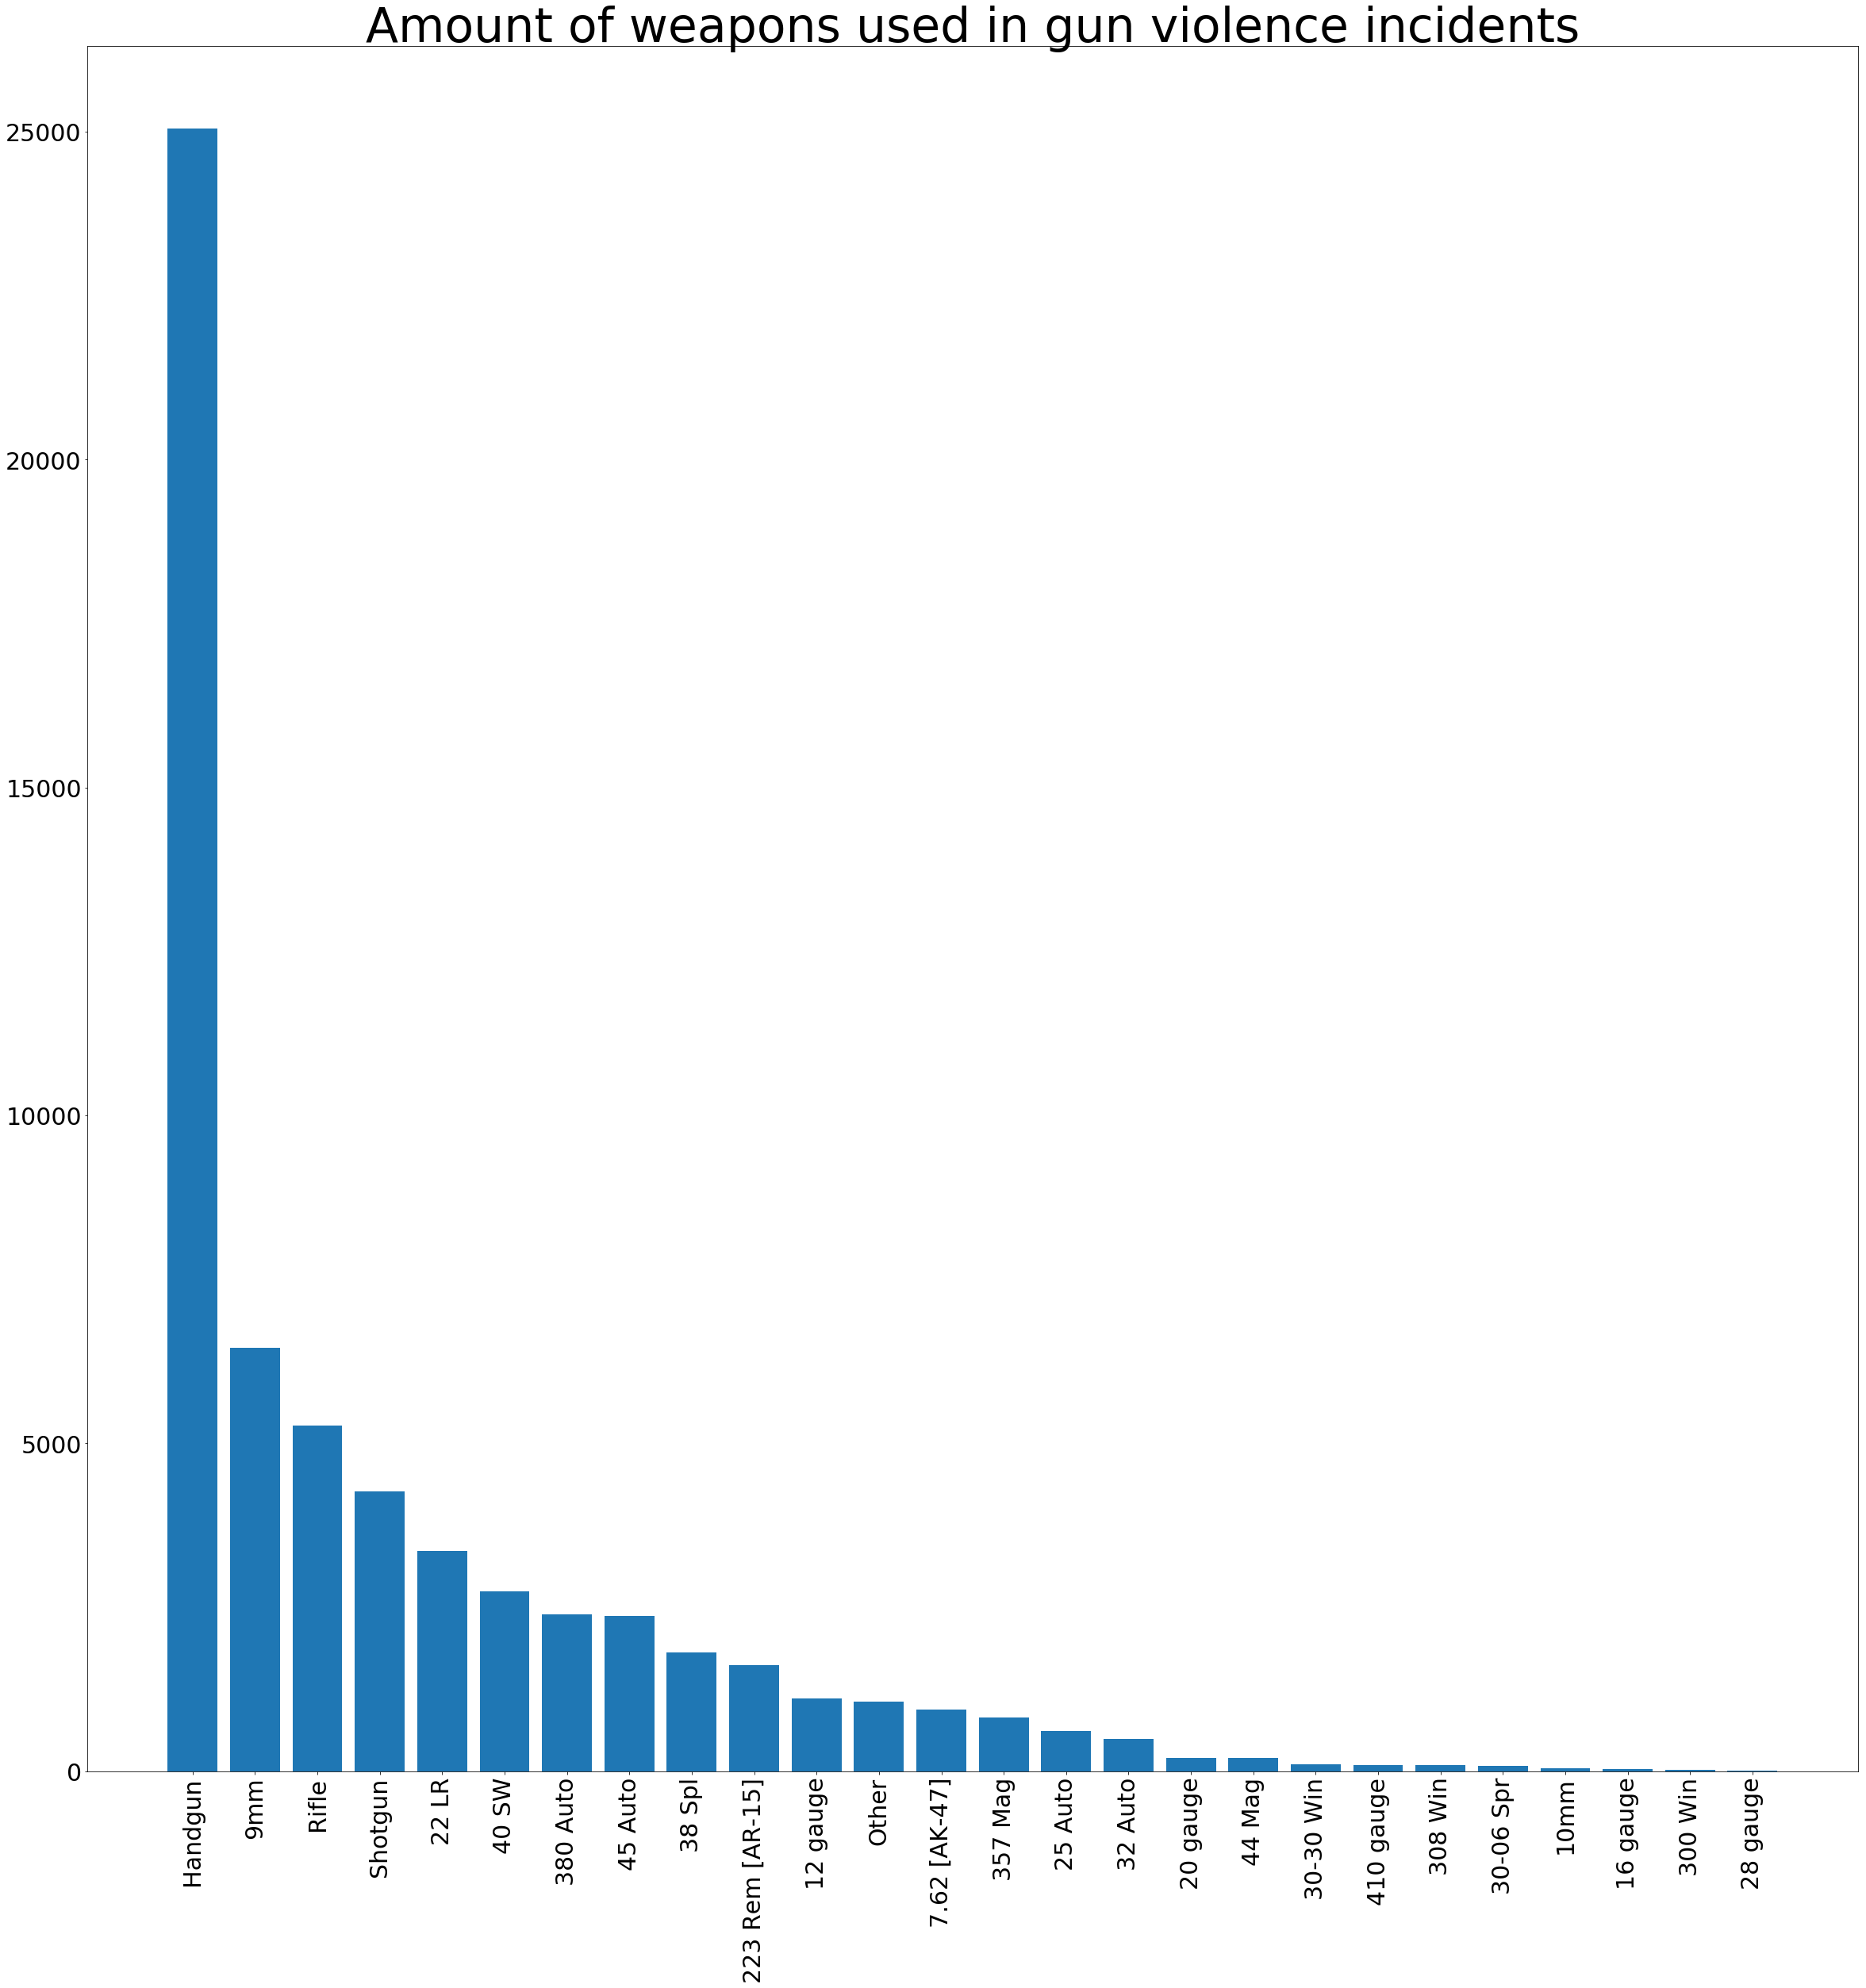

In [14]:
# dropna skips empty values
gun_type = df["gun_type"].dropna()

# empty list gun types
gun_types = [] 

# add all gun types to the list gun_types
for gun_t in gun_type:
    gun_t = csv_dict_to_py_list(gun_t)
    gun_types.extend(gun_t)

# count occurences in dictionary
D = dict((x,gun_types.count(x)) for x in set(gun_types))

# optional to remove Unknown from dict
del D['Unknown']

# sort the dictionary by value size
D = dict(reversed(sorted(D.items(), key=operator.itemgetter(1))))

# plot figure
plt.figure(figsize=(40,40))
plt.bar(range(len(D)), list(D.values()), align='center')
plt.yticks(size=30)
plt.xticks(range(len(D)), list(D.keys()), rotation='vertical',size=30)
plt.title('Amount of weapons used in gun violence incidents', fontsize=60)
plt.show()

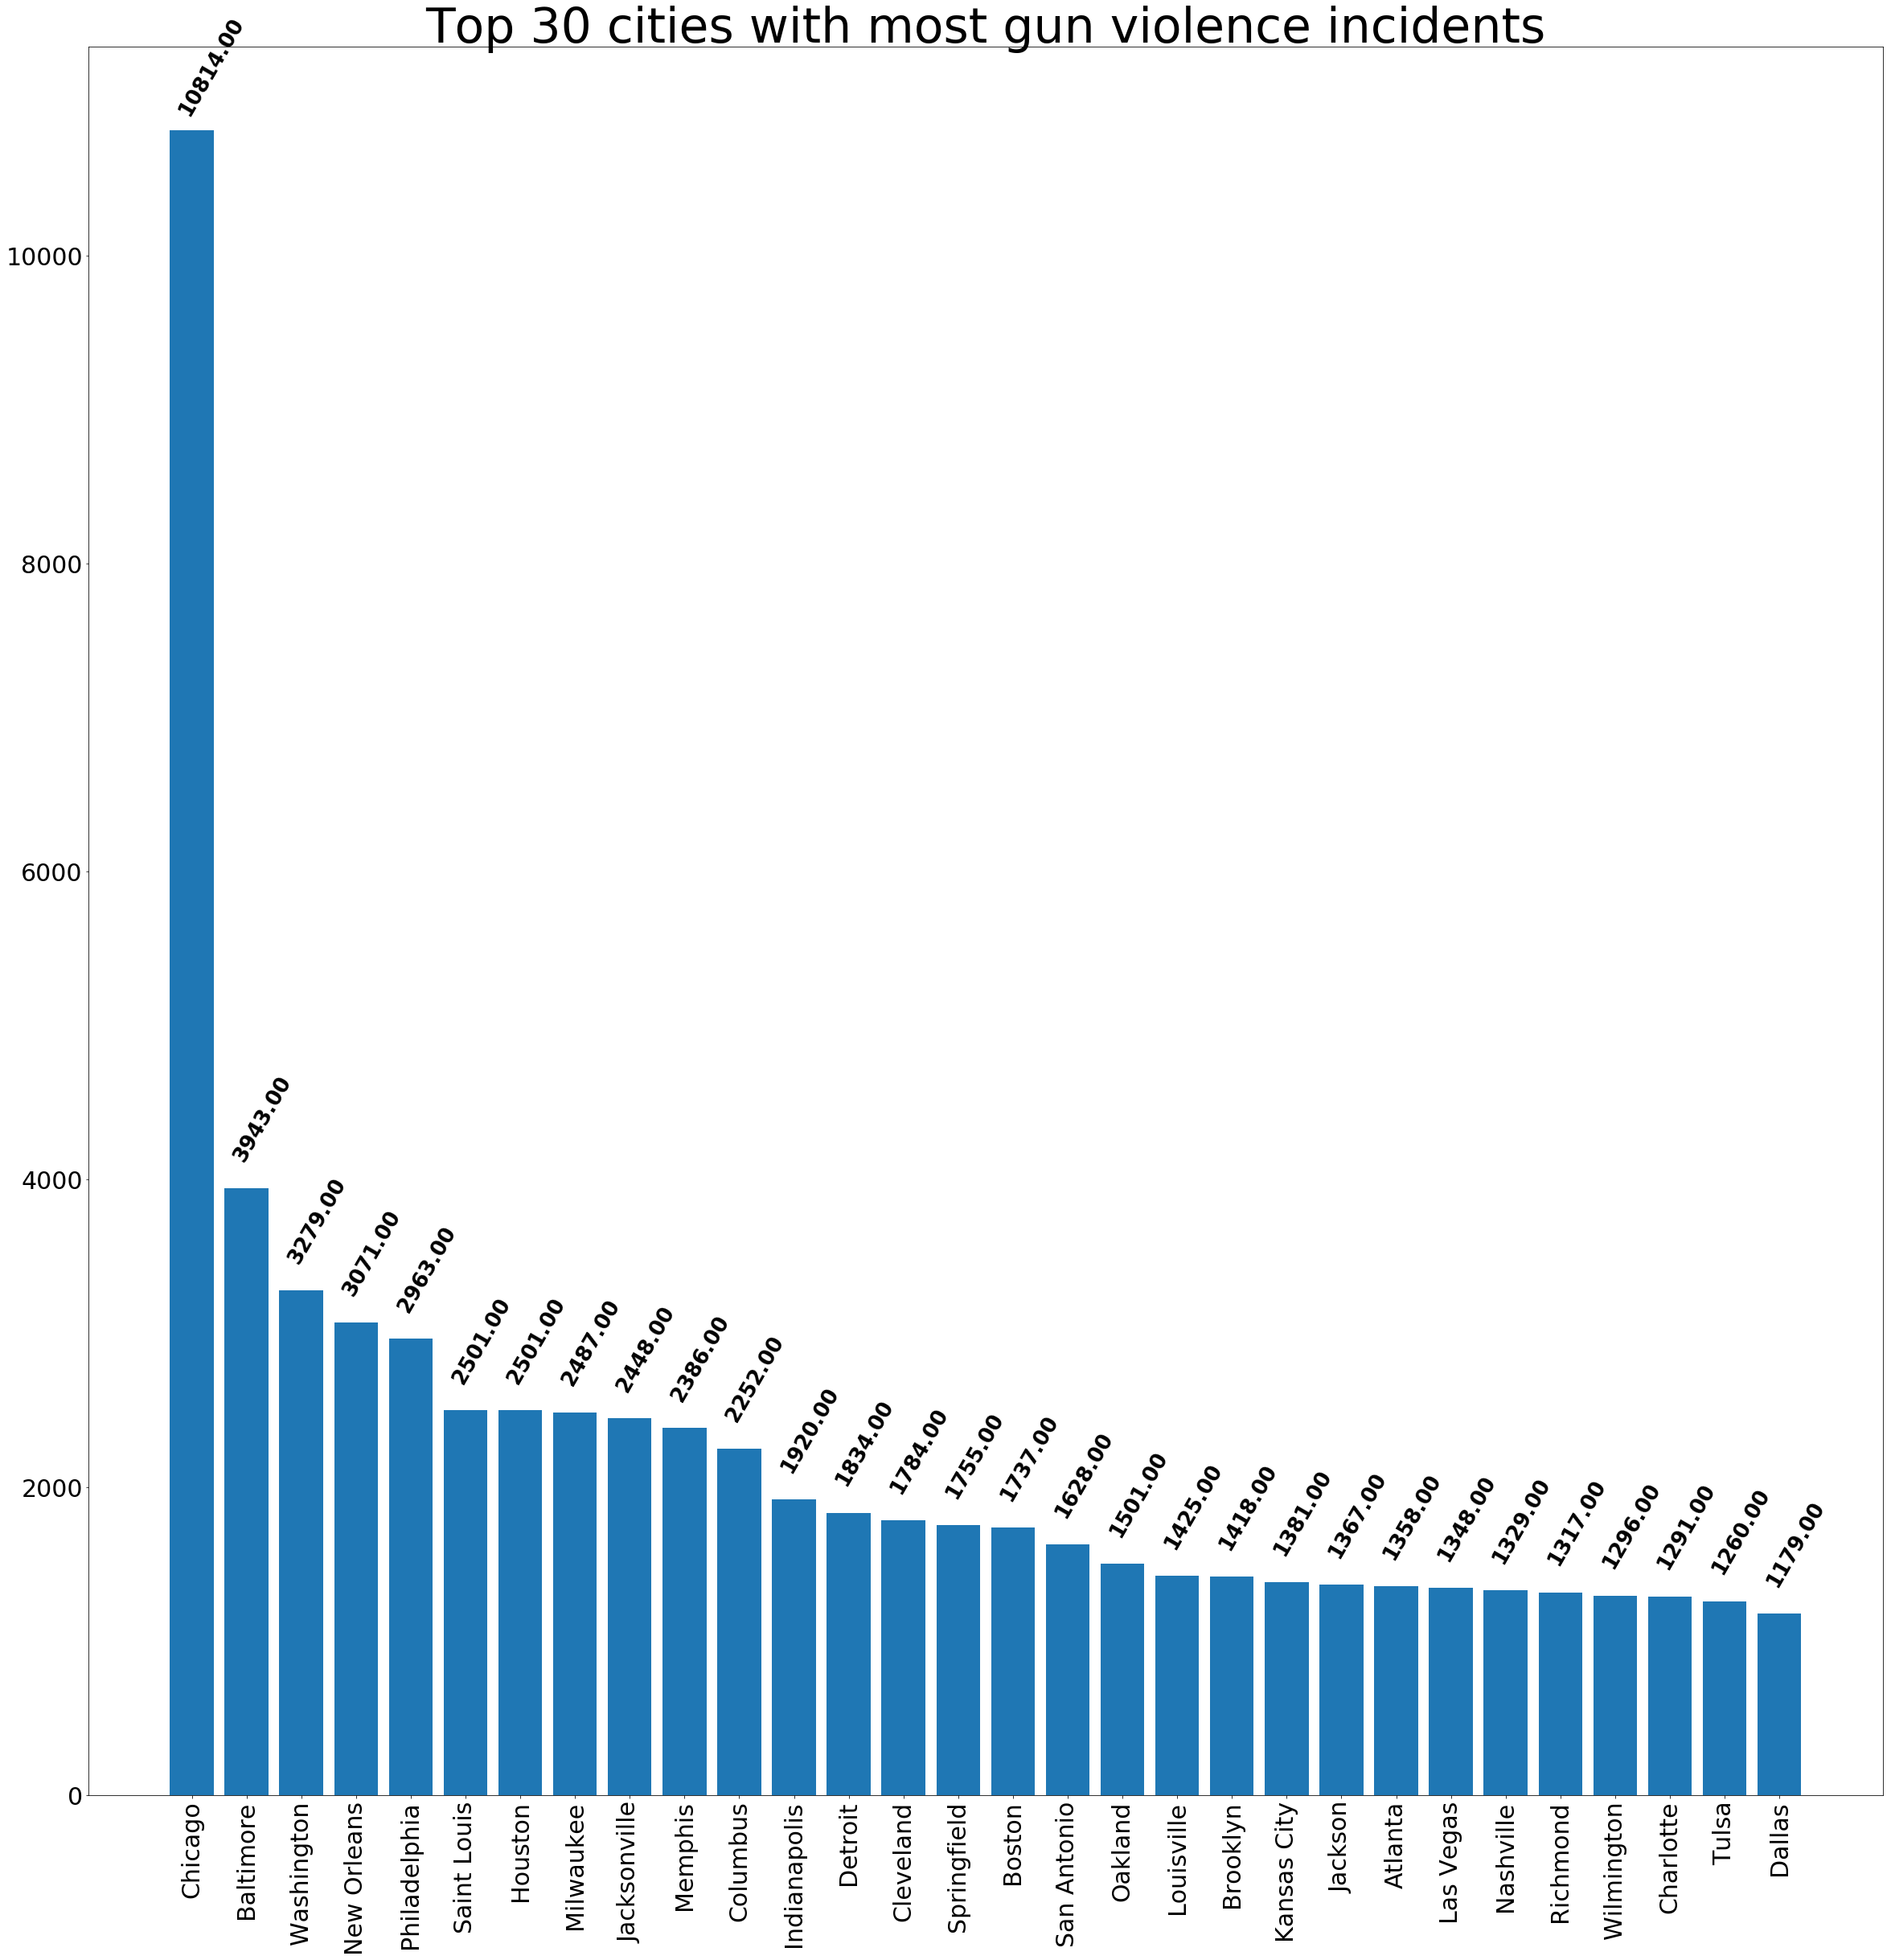

In [15]:
# dropna skips empty values
city_or_county = df["city_or_county"].dropna()

# empty list gun types
city_or_county_list = [] 

# add all gun types to the list gun_types
for citycounty in city_or_county:
    city_or_county_list.append(citycounty)

# count occurences in dictionary
city_crimes = dict((x,city_or_county_list.count(x)) for x in set(city_or_county_list))

# sort the dictionary by value size
city_crimes = dict(reversed(sorted(city_crimes.items(), key=operator.itemgetter(1))))

# take the top 30 biggest cities
city_crimes_top30 = {k: city_crimes[k] for k in list(city_crimes)[:30]}

# plot figure
plt.figure(figsize=(40,40))
plt.bar(range(len(city_crimes_top30)), list(city_crimes_top30.values()), align='center')
plt.yticks(size=30)

for i, v in enumerate(city_crimes_top30.values()):
    t = plt.text(i - 0.3, (v + 650), '{0:.2f}'.format(v), color='black', fontweight='bold', fontsize=26, rotation=60)
    
plt.title('Top 30 cities with most gun violence incidents', fontsize=60)
plt.xticks(range(len(city_crimes_top30)), list(city_crimes_top30.keys()), rotation='vertical',size=30)
plt.show()

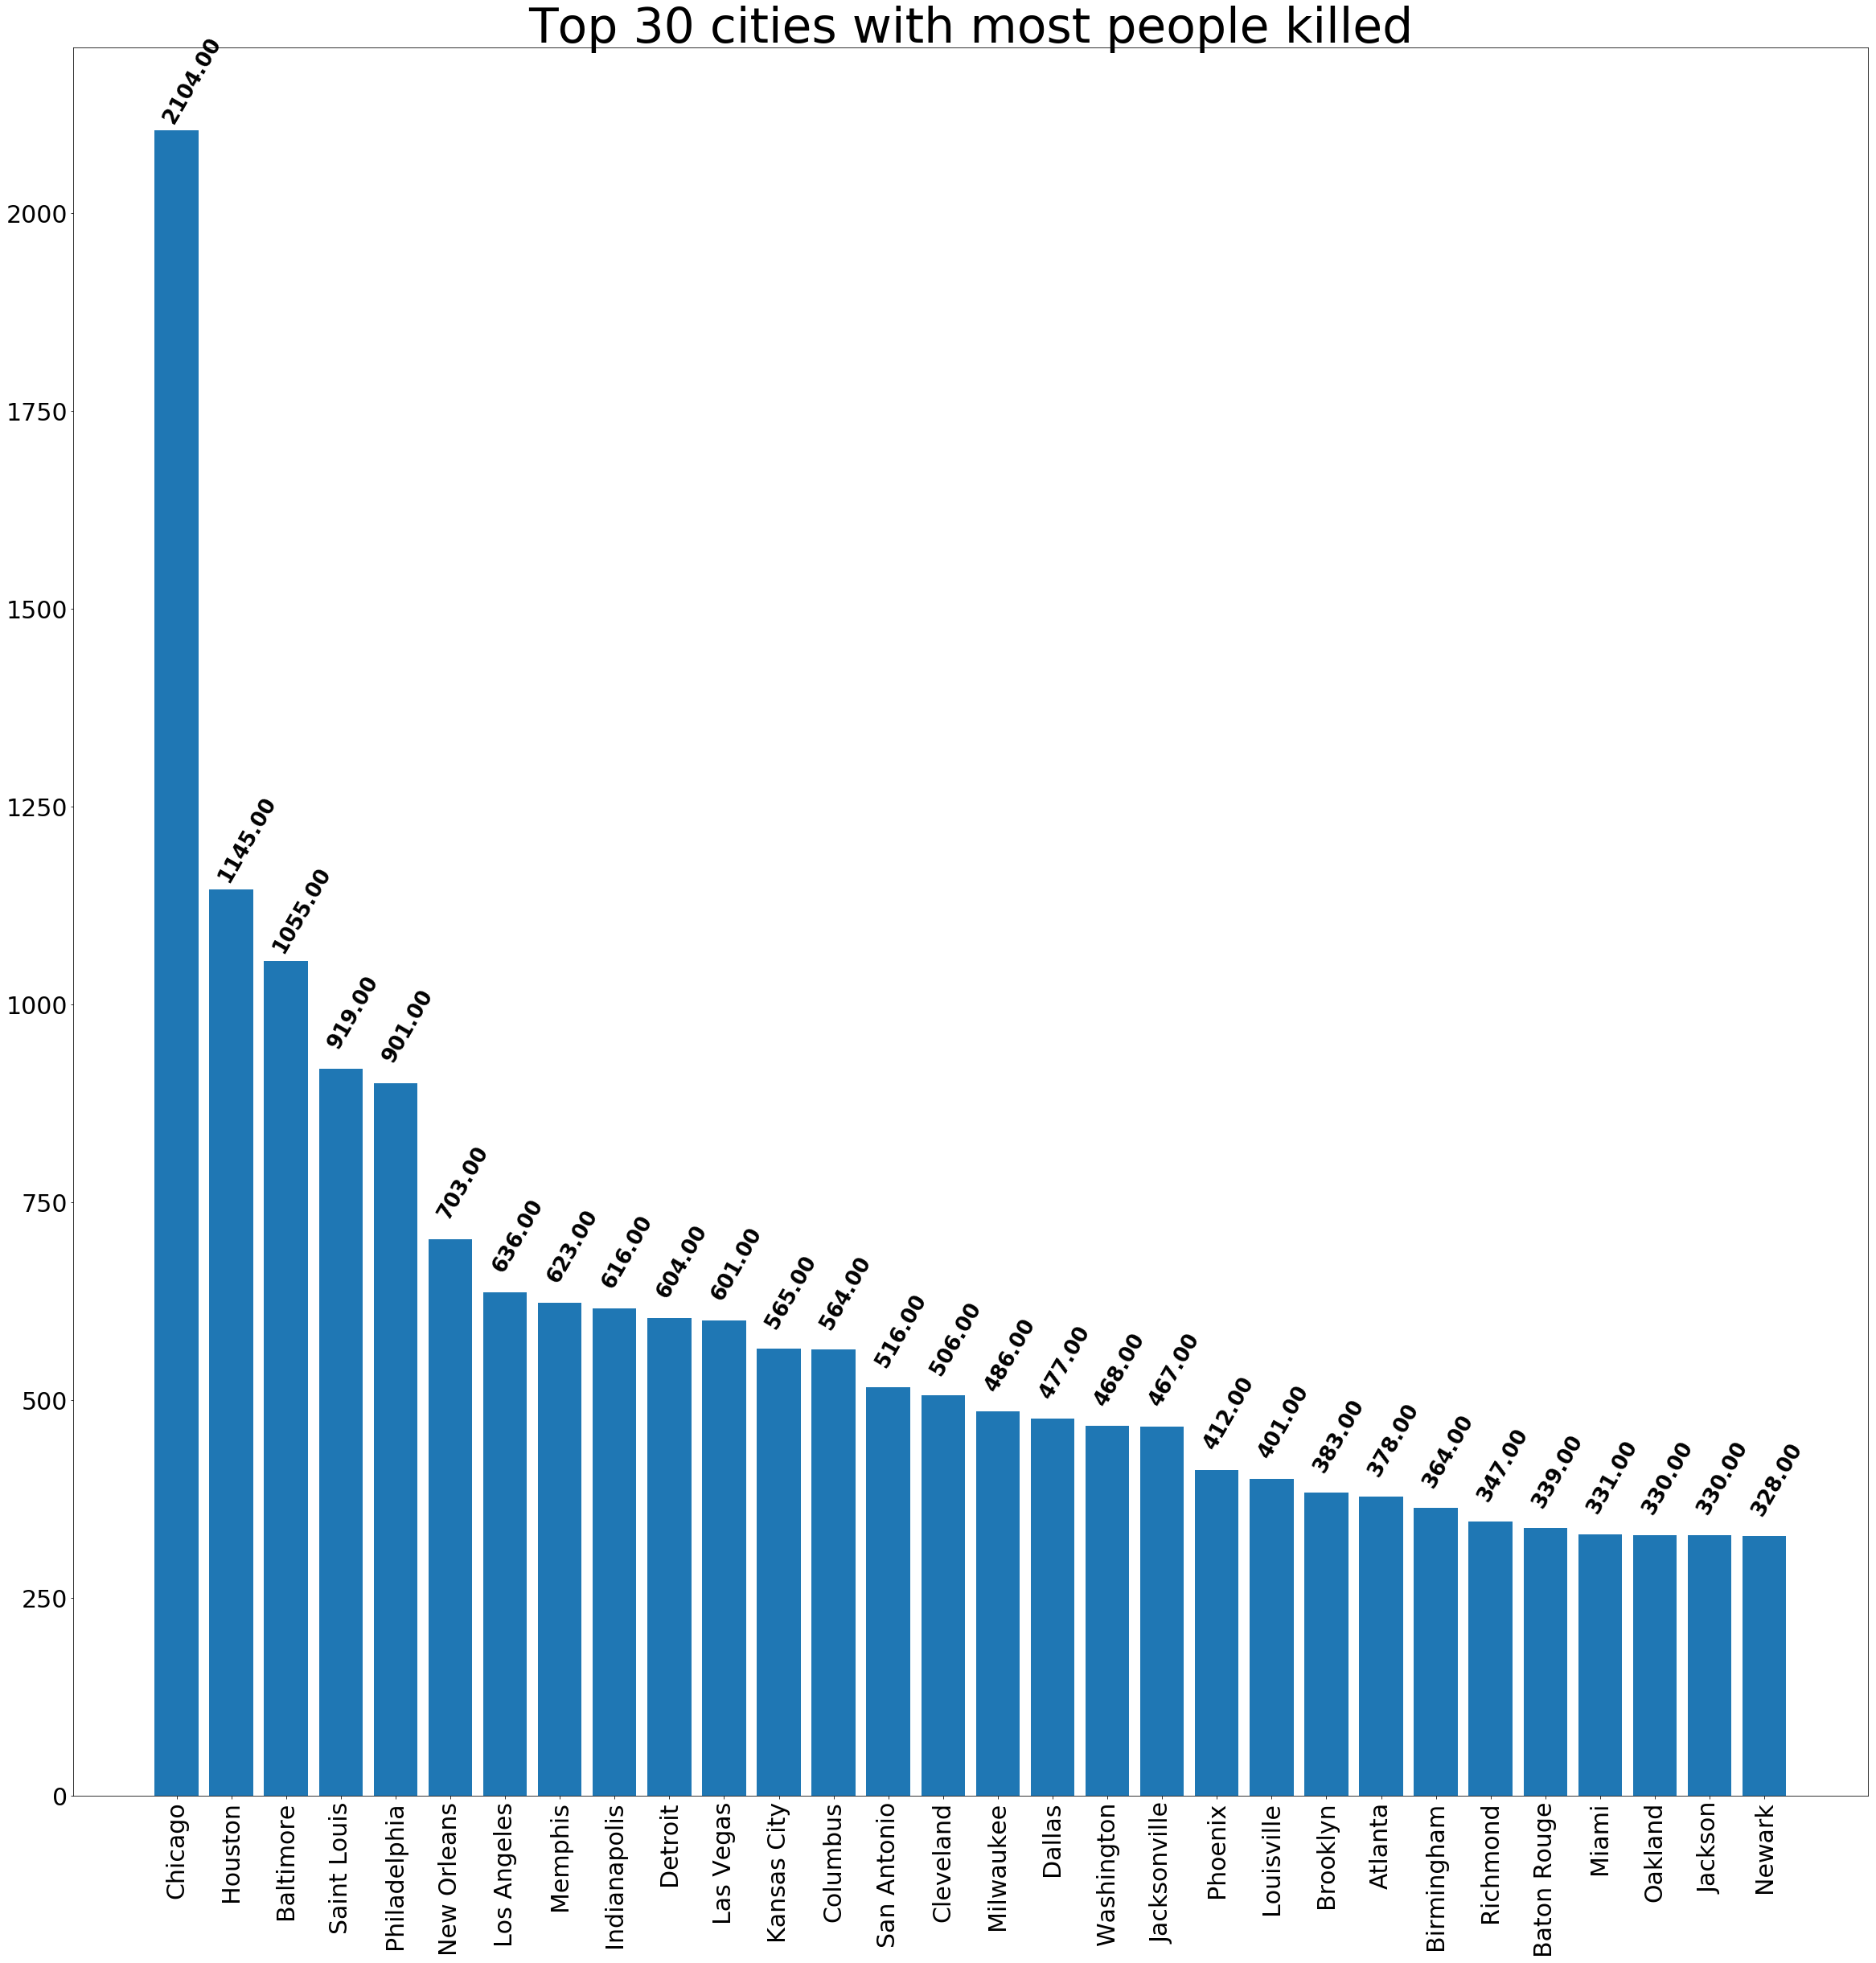

In [16]:
# dropna skips empty values
city_or_county = df[["city_or_county", "n_killed"]]

city_killed = []

for citycounty,n_killed in city_or_county.values:
    city_killed.append([citycounty,n_killed])

killed_per_city = {}

for tup in city_killed:
    if tup[0] in killed_per_city.keys():
        killed_per_city[tup[0]] += tup[1]
    else:
        killed_per_city[tup[0]] = tup[1]

# sort the dictionary by value size
killed_per_city = dict(reversed(sorted(killed_per_city.items(), key=operator.itemgetter(1))))

# take the top 30 biggest cities
killed_per_city_top30 = {k: killed_per_city[k] for k in list(killed_per_city)[:30]}

# plot figure

plt.figure(figsize=(40,40))
plt.bar(range(len(killed_per_city_top30)), list(killed_per_city_top30.values()), align='center')
plt.yticks(size=30)

for i, v in enumerate(killed_per_city_top30.values()):
    t = plt.text(i - 0.3, (v + 102), '{0:.2f}'.format(v), color='black', fontweight='bold', fontsize=26, rotation=60)

plt.xticks(range(len(killed_per_city_top30)), list(killed_per_city_top30.keys()), rotation='vertical',size=30)
plt.title('Top 30 cities with most people killed', fontsize=60)
plt.show()

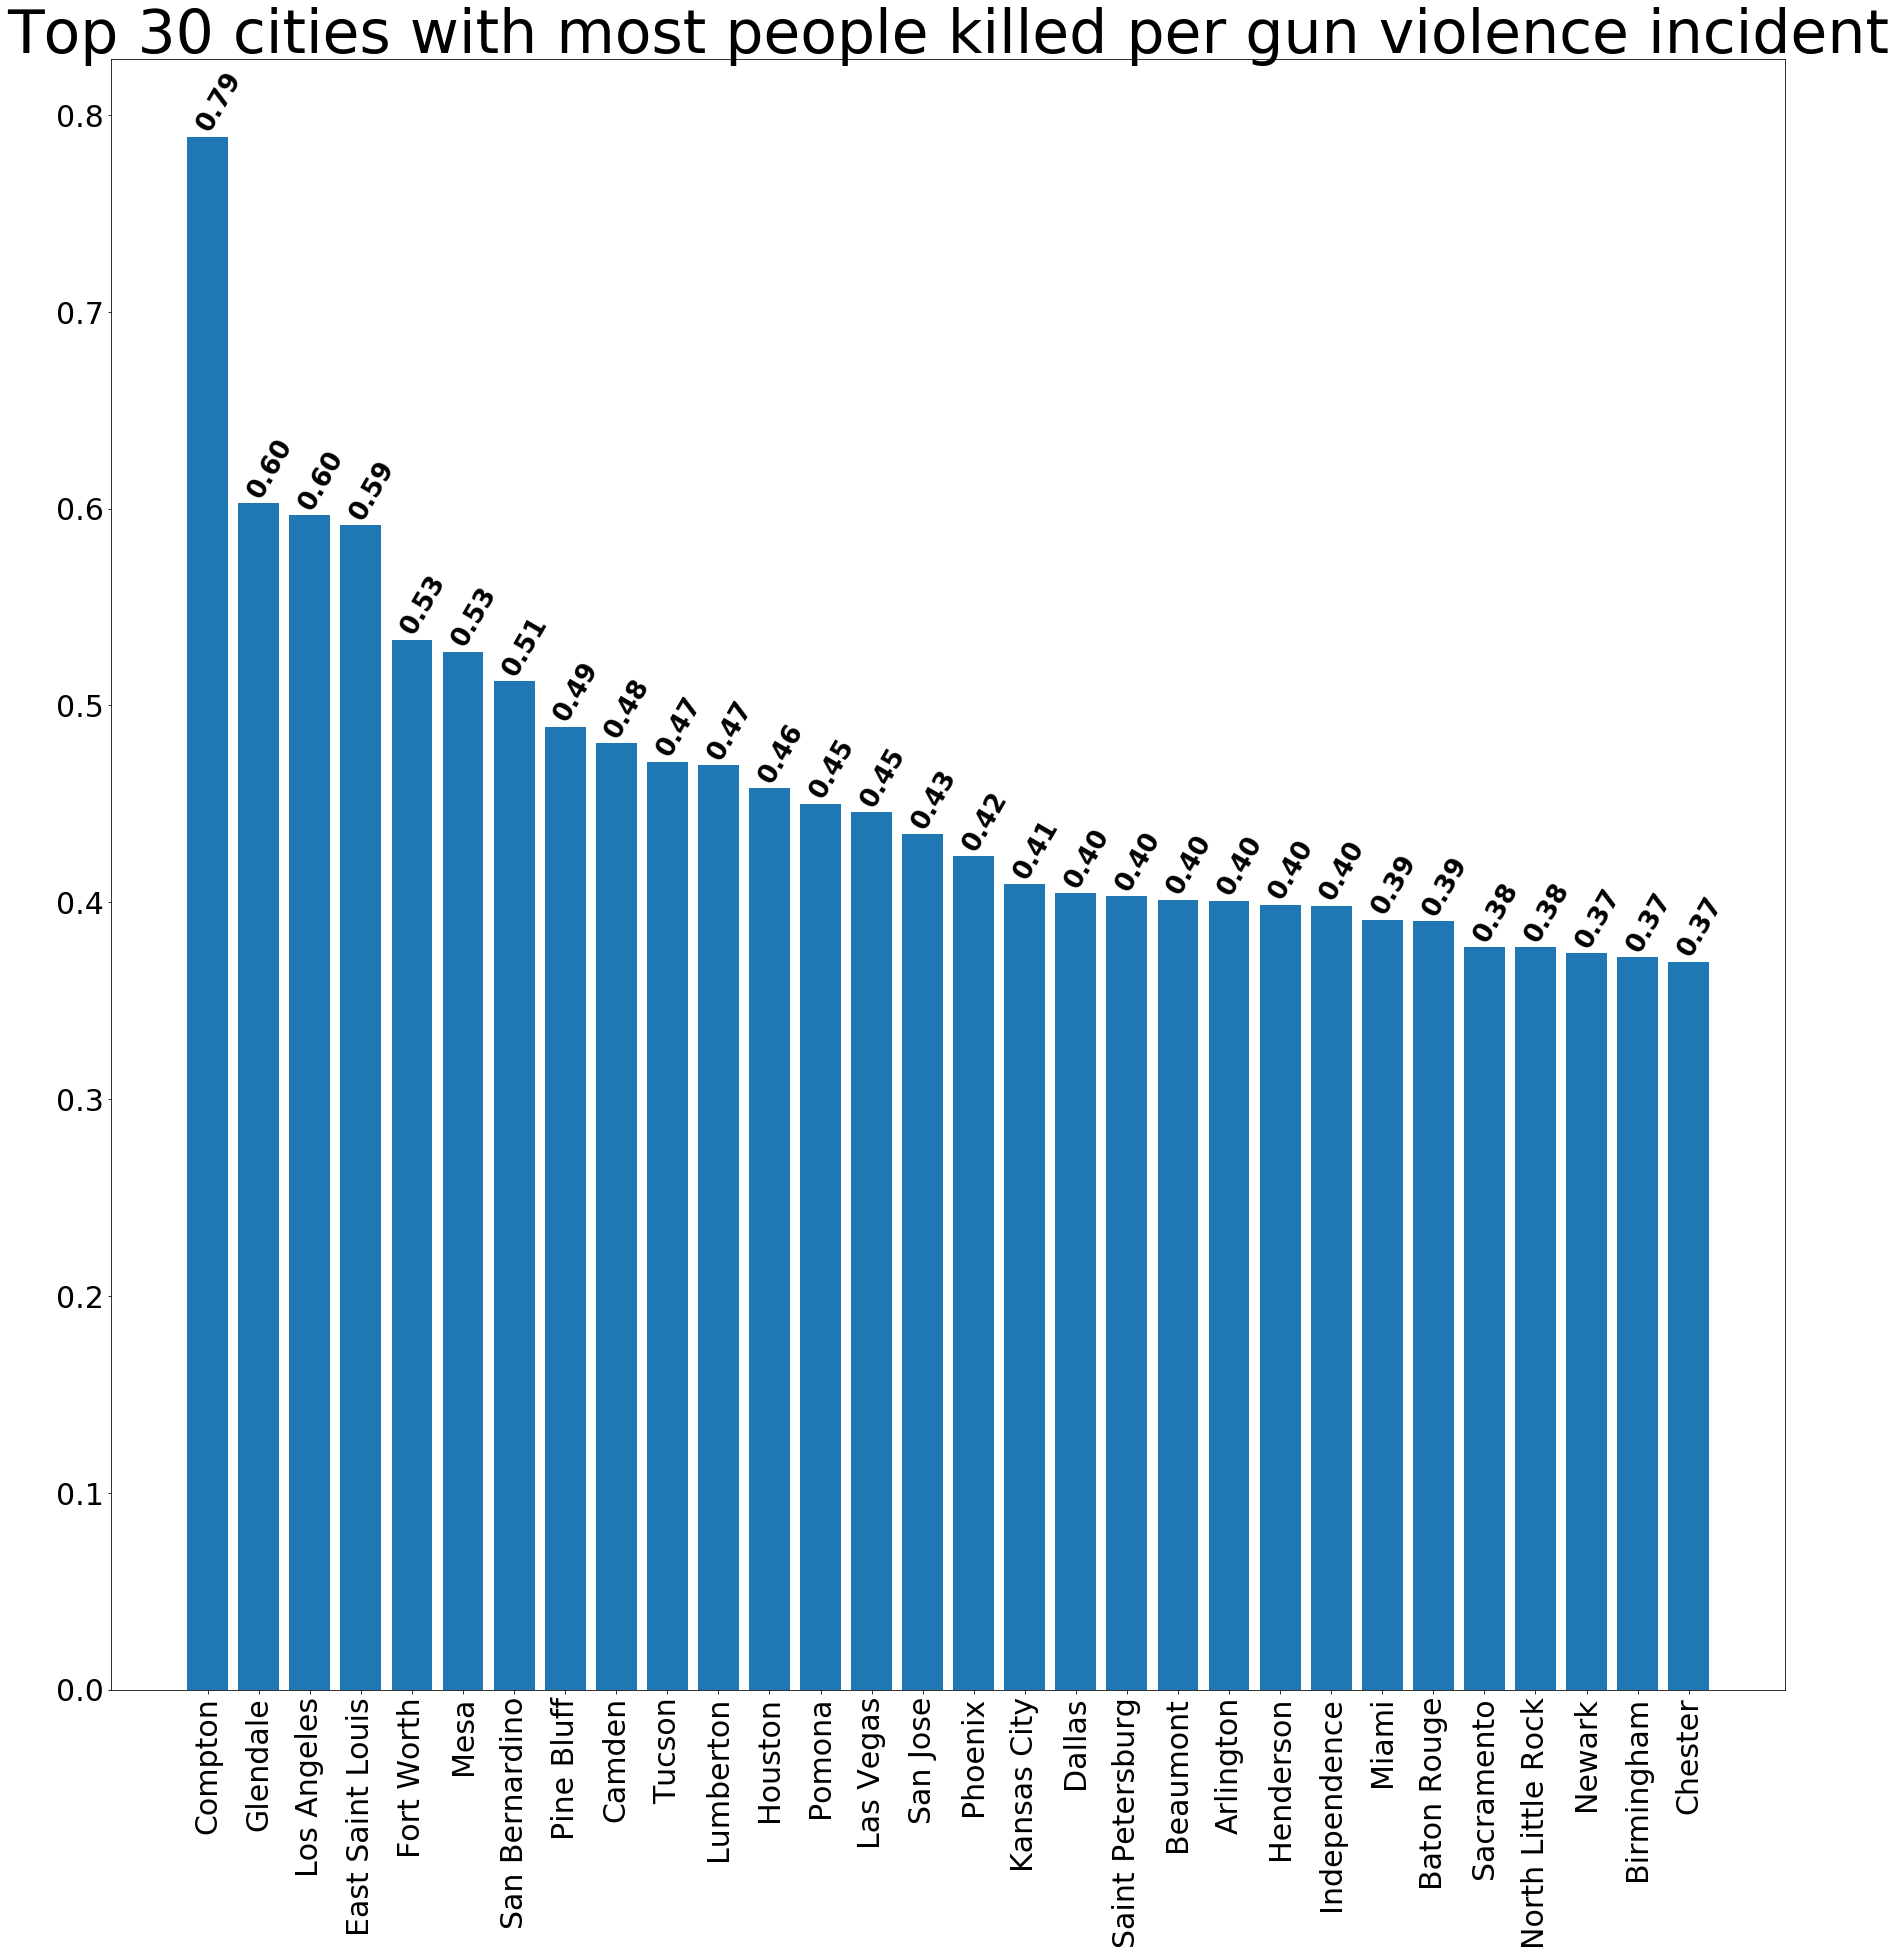

In [17]:
# dropna skips empty values
city_or_county = df["city_or_county"].dropna()


city_or_county_list = [] 


for citycounty in city_or_county:
    city_or_county_list.append(citycounty)

# count occurences in dictionary
city_crimes = dict((x,city_or_county_list.count(x)) for x in set(city_or_county_list))


# dropna skips empty values
city_or_county = df[["city_or_county", "n_killed"]]

city_killed = []

for citycounty,n_killed in city_or_county.values:
    city_killed.append([citycounty,n_killed])

killed_per_city = {}

for tup in city_killed:
    if tup[0] in killed_per_city.keys():
        killed_per_city[tup[0]] += tup[1]
    else:
        killed_per_city[tup[0]] = tup[1]
        
        
## people killed per shooting ##
killed_per_shooting = {}

for key in killed_per_city:
    peoplekilled = killed_per_city[key]
    occurences = city_crimes[key]
    # Safety measure
    if occurences >= 100:
        killed_per_shooting[key] = peoplekilled/occurences


# sort the dictionary by value size
killed_per_shooting = dict(reversed(sorted(killed_per_shooting.items(), key=operator.itemgetter(1))))

# take the top 30 biggest cities
killed_per_shooting_top30 = {k: killed_per_shooting[k] for k in list(killed_per_shooting)[:30]}

    
# plot figure
plt.figure(figsize=(30,30))
plt.bar(range(len(killed_per_shooting_top30)), list(killed_per_shooting_top30.values()), align='center')
plt.yticks(size=30)

for i, v in enumerate(killed_per_shooting_top30.values()):
    t = plt.text(i - 0.3, v + 0.025, '{0:.2f}'.format(v), color='black', fontweight='bold', fontsize=26, rotation=60)

plt.title('Top 30 cities with most people killed per gun violence incident', fontsize=60)    
plt.xticks(range(len(killed_per_shooting_top30)), list(killed_per_shooting_top30.keys()), rotation='vertical',size=30)
plt.show()




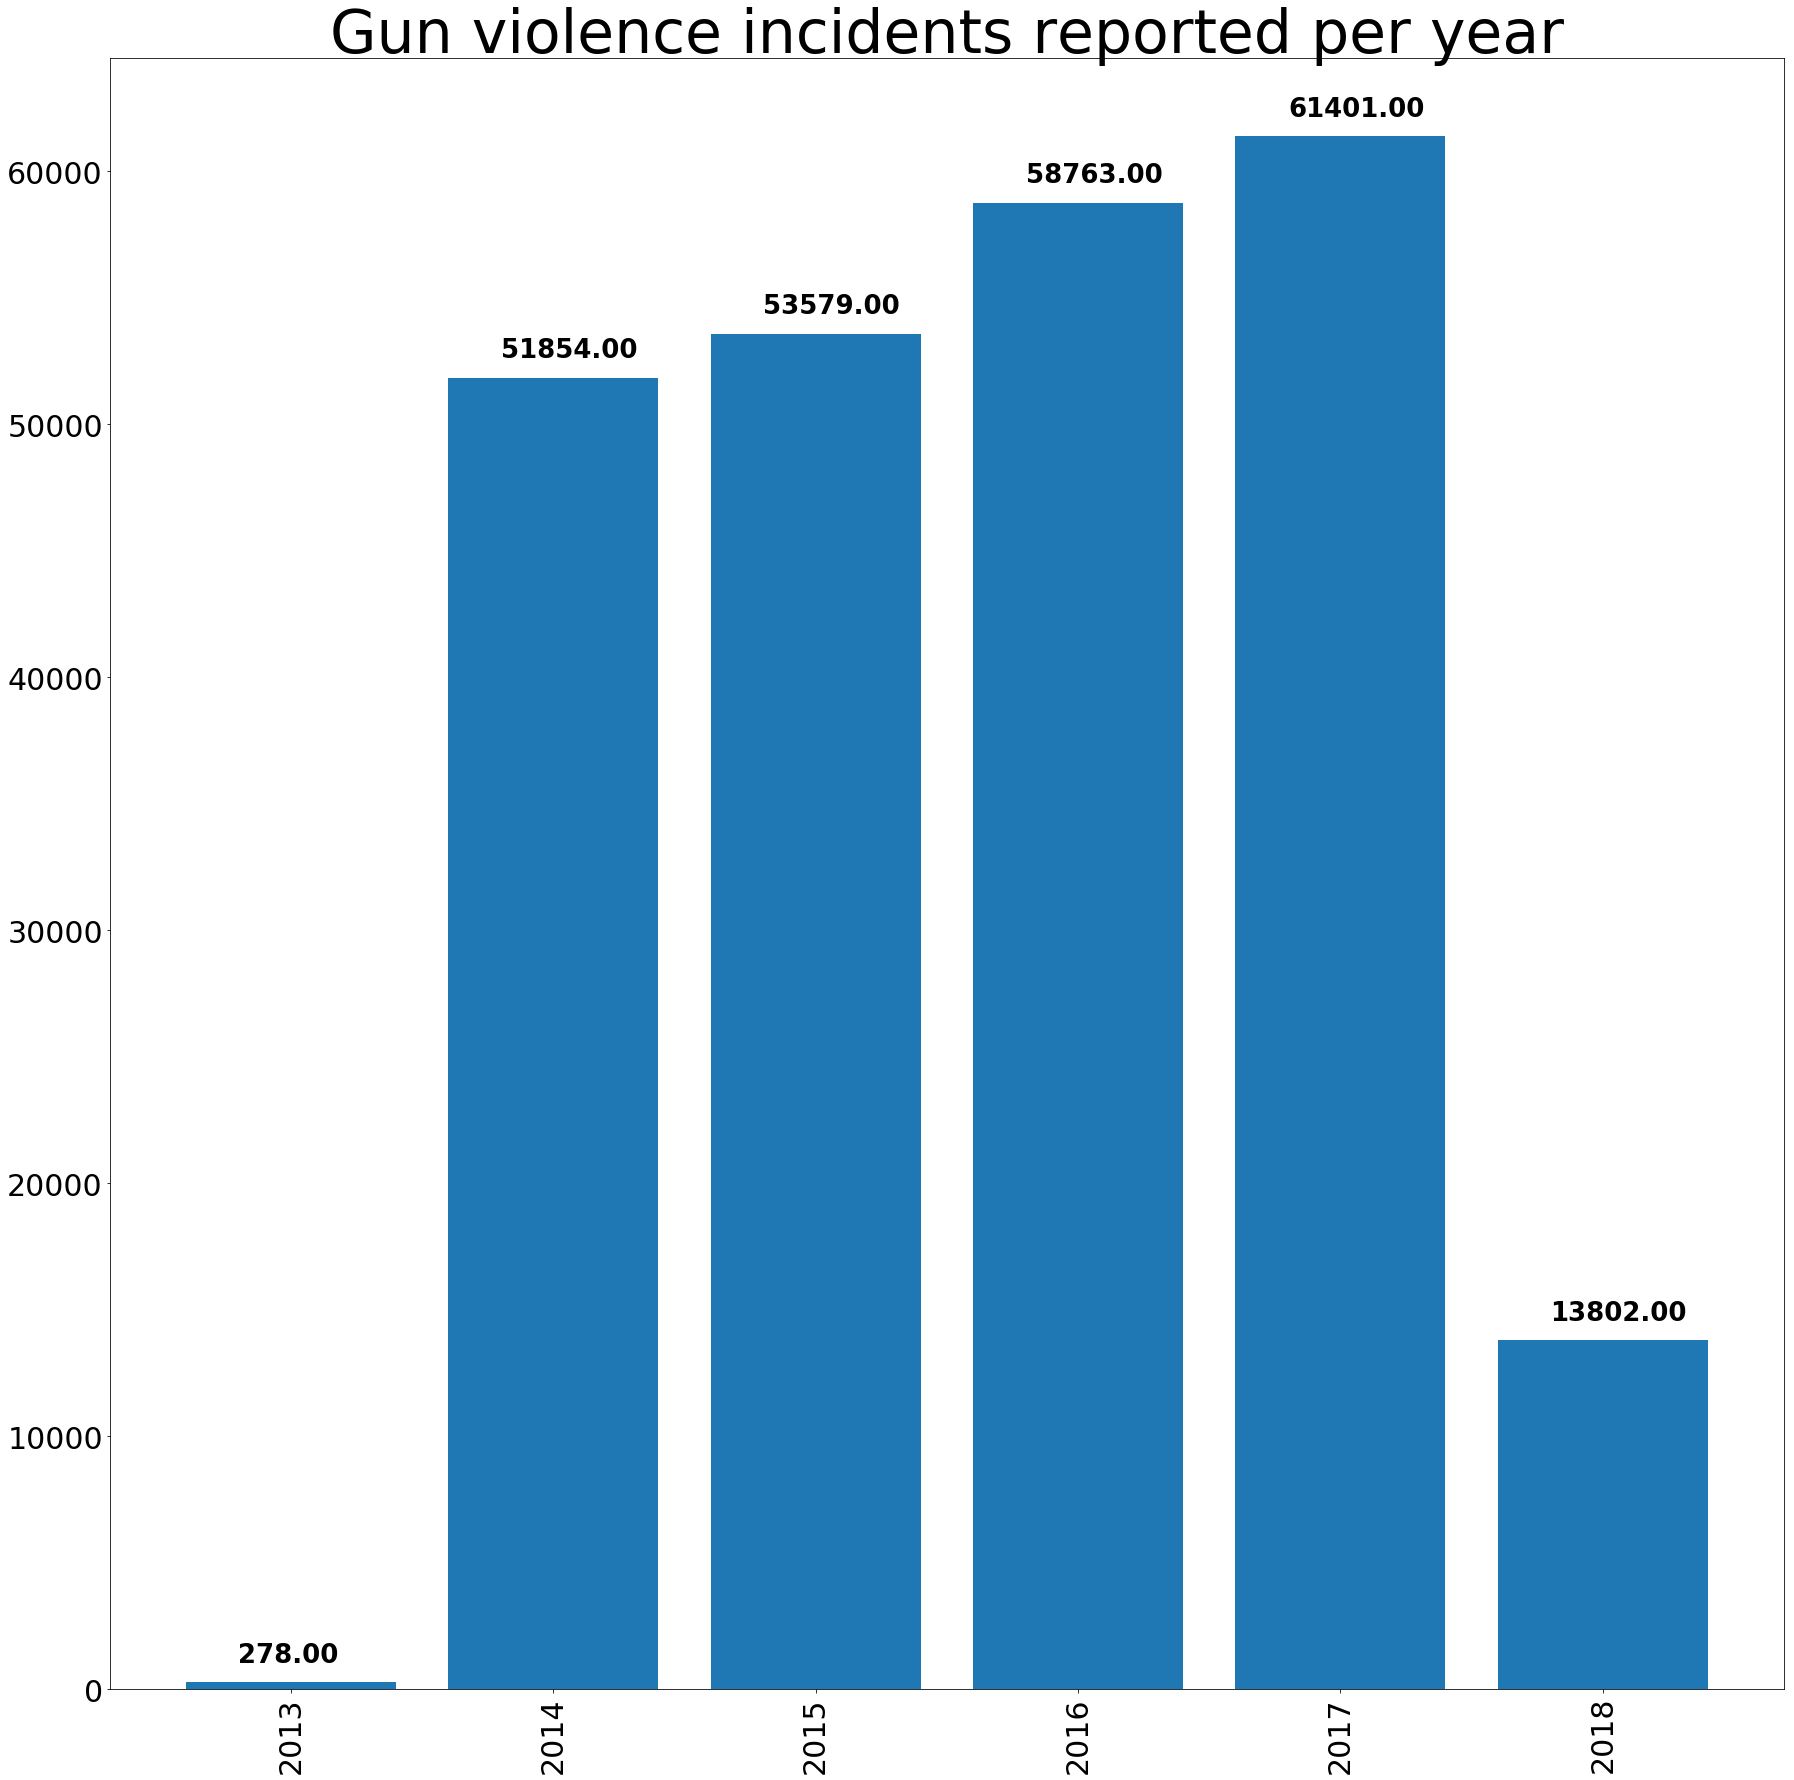

In [18]:
Dates = df["date"].values

occurences = {}
for date in Dates:
    year = date[:4]
    if year in occurences: 
        occurences[year] += 1
    else:
        occurences[year] = 1

    
# plot figure
plt.figure(figsize=(30,30))
plt.bar(range(len(occurences)), list(occurences.values()), align='center')
plt.yticks(size=30)

for i, v in enumerate(occurences.values()):
    t = plt.text(i - 0.2, v + 800, '{0:.2f}'.format(v), color='black', fontweight='bold', fontsize=26)

plt.title('Gun violence incidents reported per year', fontsize=60)    
plt.xticks(range(len(occurences)), list(occurences.keys()), rotation='vertical',size=30)
plt.show()


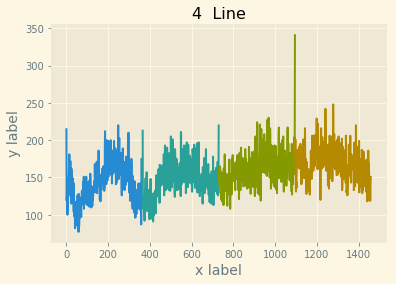

In [19]:
#2014,2015,2016,2017

Dates = df["date"]

date_violence = {}
previousdate = ''
i = 0
for date in Dates:
    # skip 2013 and 2018 cause incomplete data
    if (date[:4] != '2013') and (date[:4] != '2018'): 
        if date != previousdate:
            i += 1

        if i in date_violence: 
            date_violence[i] += 1
        else:
            date_violence[i] = 1
            
        previousdate = date



y_2014 = {k: date_violence[k] for k in list(date_violence)[0:365]}
y_2015 = {k: date_violence[k] for k in list(date_violence)[365:730]}
y_2016 = {k: date_violence[k] for k in list(date_violence)[730:1095]}
y_2017 = {k: date_violence[k] for k in list(date_violence)[1095:1458]}



x_2014 = list(y_2014.keys())           
y_2014 = list(y_2014.values())  

x_2015 = list(y_2015.keys())           
y_2015 = list(y_2015.values())  

x_2016 = list(y_2016.keys())           
y_2016 = list(y_2016.values())  

x_2017 = list(y_2017.keys())           
y_2017 = list(y_2017.values())  


with plt.style.context('Solarize_Light2'):
    plt.plot(x_2014, y_2014)
    plt.plot(x_2015, y_2015)
    plt.plot(x_2016, y_2016)
    plt.plot(x_2017, y_2017)
    # Number of accent colors in the color scheme
    plt.title('4  Line')
    plt.xlabel('x label', fontsize=14)
    plt.ylabel('y label', fontsize=14)

plt.show()

 # take the top 10 for future use
date_violence_top10 = {k: date_violence[k] for k in list(date_violence)[:10]}




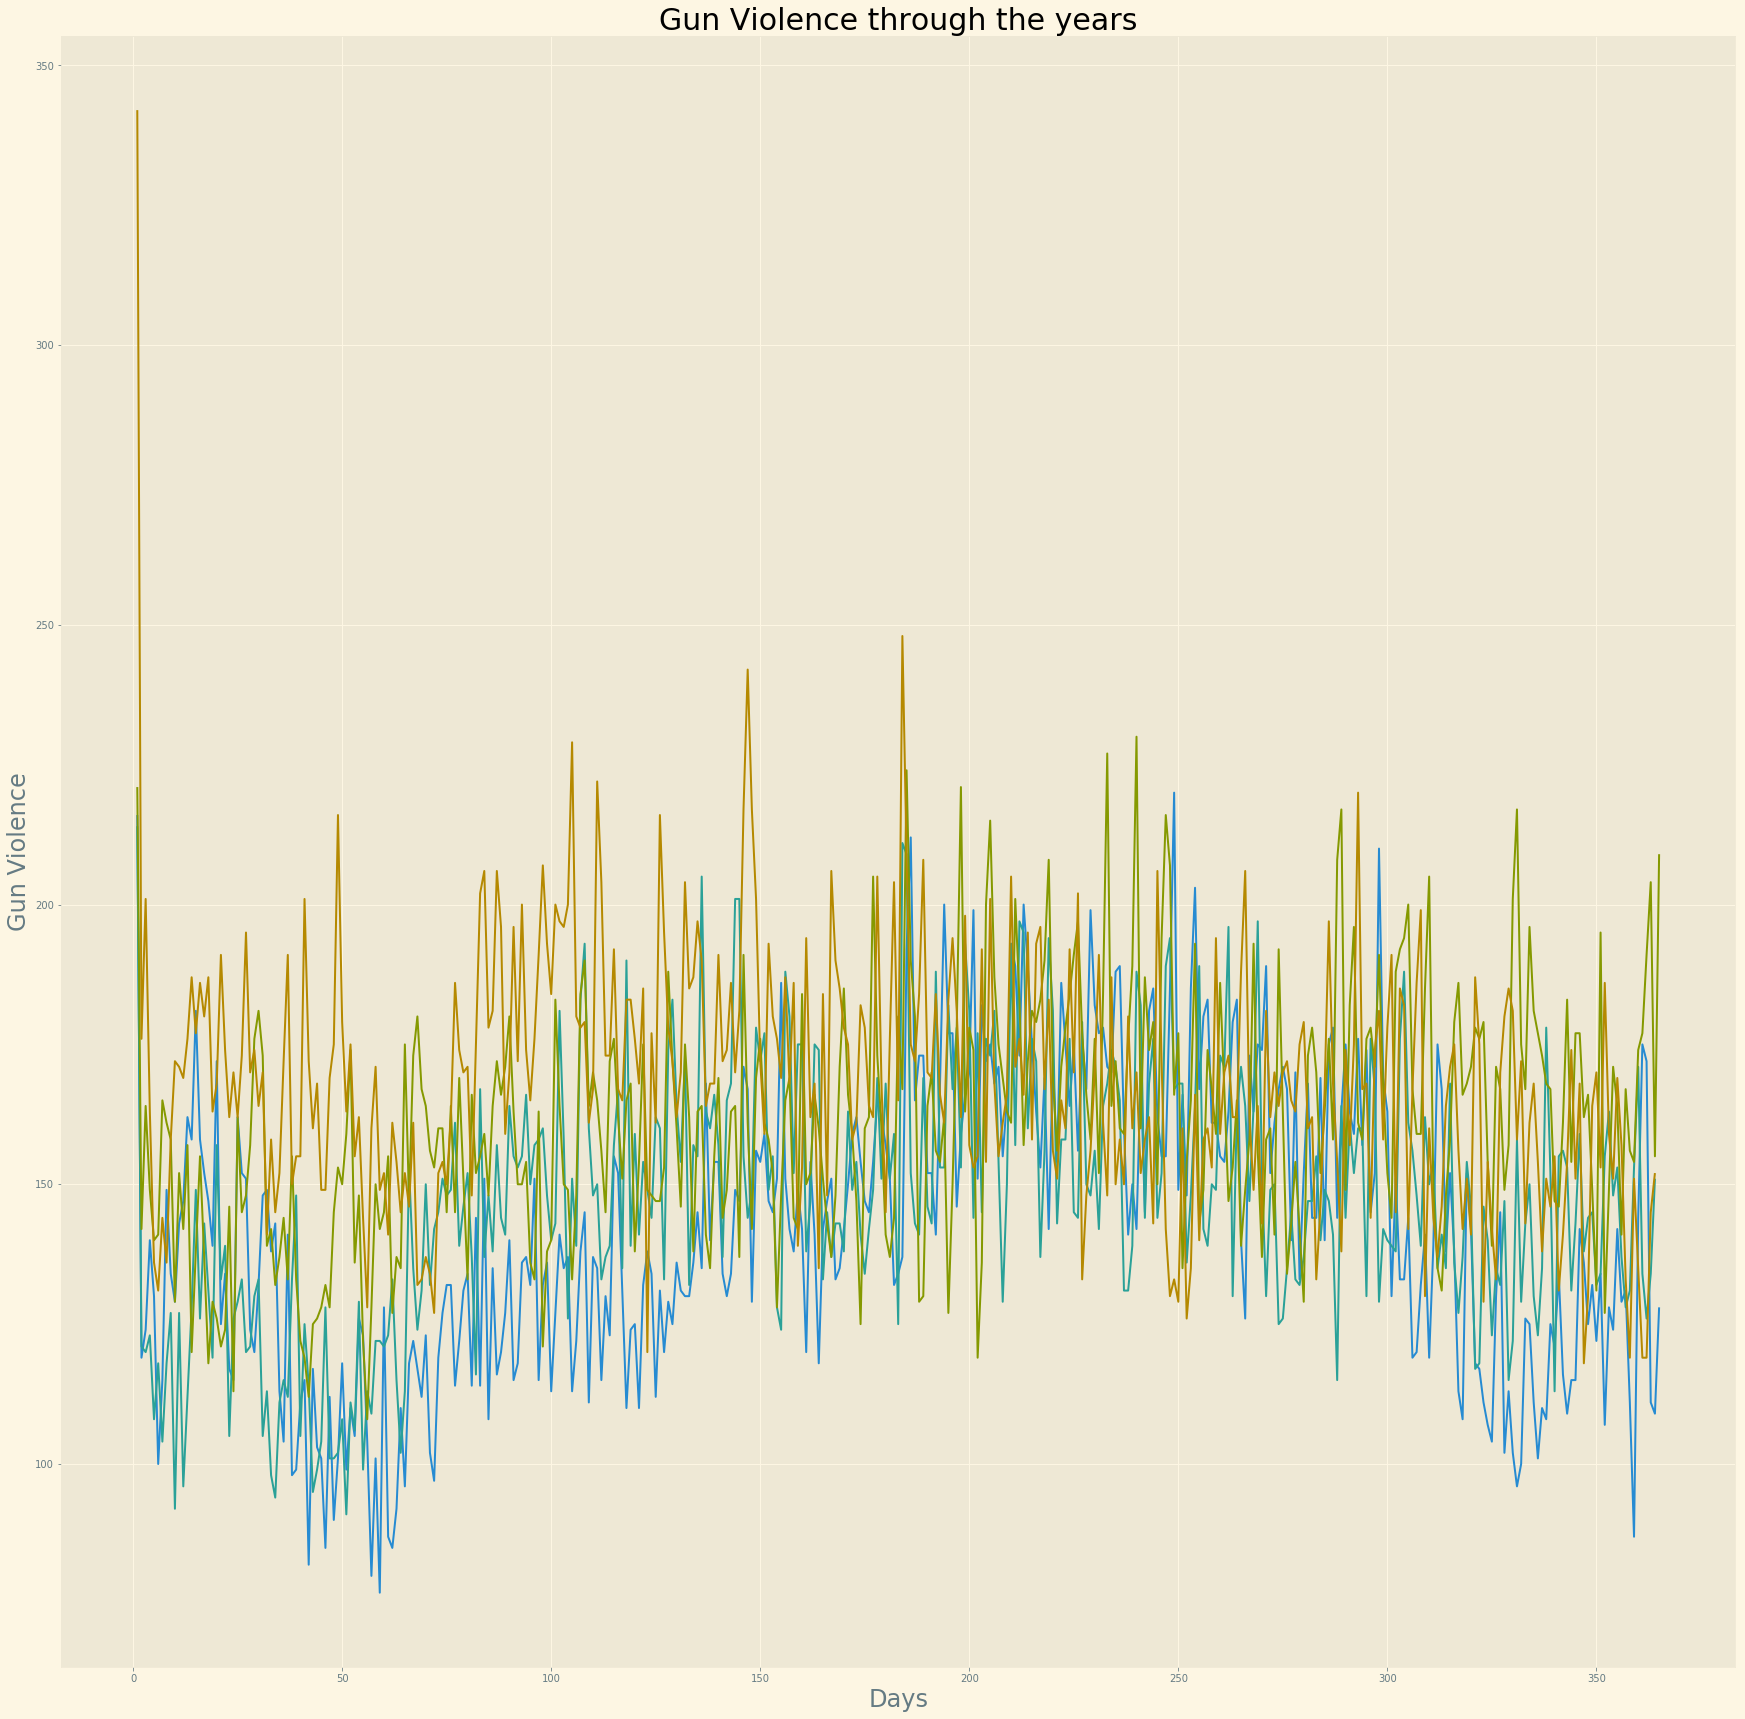

In [20]:
Dates = df["date"]

list_of_dicts = [{},{},{},{},{}]
d = 0
i = 0
previousyear = '2014'

for date in Dates:
    year_atm = date[:4]
    if (year_atm != '2013') and (year_atm != '2018'):
        if year_atm != previousyear:
            d += 1
            i = 0
            
        if date != previousdate:
            i += 1

        if i in list_of_dicts[d]: 
            list_of_dicts[d][i] += 1
        else:
            list_of_dicts[d][i] = 1

    previousyear = year_atm
    previousdate = date
    
list_of_dicts.pop(0)
    
    
with plt.style.context('Solarize_Light2'):
    plt.figure(figsize=(30,30))
    for dictionary in list_of_dicts:
        plt.plot(dictionary.keys(), dictionary.values())
    plt.title('Gun Violence through the years', fontsize=30)
    plt.xlabel('Days', fontsize=24)
    plt.ylabel('Gun Violence', fontsize=24)

plt.show()


In [21]:
list_of_lists = [[],[],[],[],[],[],[],[]]
# 5 dicts, 1st is emty
i = 0

for dictionary in range(4):
    list_of_lists[i] = list(list_of_dicts[dictionary].keys())
    i += 1
    list_of_lists[i] = list(list_of_dicts[dictionary].values())
    i += 1

print(list_of_dicts)

[{1: 216, 2: 119, 3: 124, 4: 140, 5: 130, 6: 100, 7: 115, 8: 149, 9: 134, 10: 129, 11: 143, 12: 147, 13: 162, 14: 158, 15: 181, 16: 158, 17: 152, 18: 147, 19: 139, 20: 172, 21: 125, 22: 134, 23: 117, 24: 115, 25: 162, 26: 152, 27: 151, 28: 124, 29: 120, 30: 132, 31: 148, 32: 149, 33: 138, 34: 143, 35: 113, 36: 104, 37: 141, 38: 98, 39: 99, 40: 111, 41: 115, 42: 82, 43: 117, 44: 103, 45: 101, 46: 85, 47: 112, 48: 90, 49: 101, 50: 118, 51: 99, 52: 110, 53: 105, 54: 126, 55: 123, 56: 104, 57: 80, 58: 101, 59: 77, 60: 128, 61: 87, 62: 85, 63: 92, 64: 110, 65: 96, 66: 118, 67: 122, 68: 117, 69: 112, 70: 123, 71: 102, 72: 97, 73: 119, 74: 127, 75: 132, 76: 132, 77: 114, 78: 122, 79: 131, 80: 134, 81: 114, 82: 144, 83: 114, 84: 151, 85: 108, 86: 135, 87: 116, 88: 120, 89: 127, 90: 140, 91: 115, 92: 118, 93: 136, 94: 137, 95: 132, 96: 151, 97: 115, 98: 132, 99: 136, 100: 113, 101: 127, 102: 141, 103: 135, 104: 137, 105: 113, 106: 122, 107: 138, 108: 145, 109: 111, 110: 137, 111: 135, 112: 115,

In [22]:
def slope_intercept(x_val, y_val):
    x = np.array(x_val)
    y = np.array(y_val)
    m = ( ( (np.mean(x)*np.mean(y) ) - np.mean(x*y)) /
        ( ( np.mean(x)*np.mean(x)) - np.mean(x*x)))

    m = round(m,2)
    b=(np.mean(y)-np.mean(x)*m)
    b=round(b,2)
    return m,b

In [23]:
i = 0
reg = 0
regression = [[],[],[],[]]

for dictionary in range(4):
    xs = list_of_lists[i]
    i += 1
    ys = list_of_lists[i]
    m, b = slope_intercept(xs, ys)
    regression[reg] = reg_line=[(m*x)+b for x in xs]
    i += 1
    reg += 1
    
    

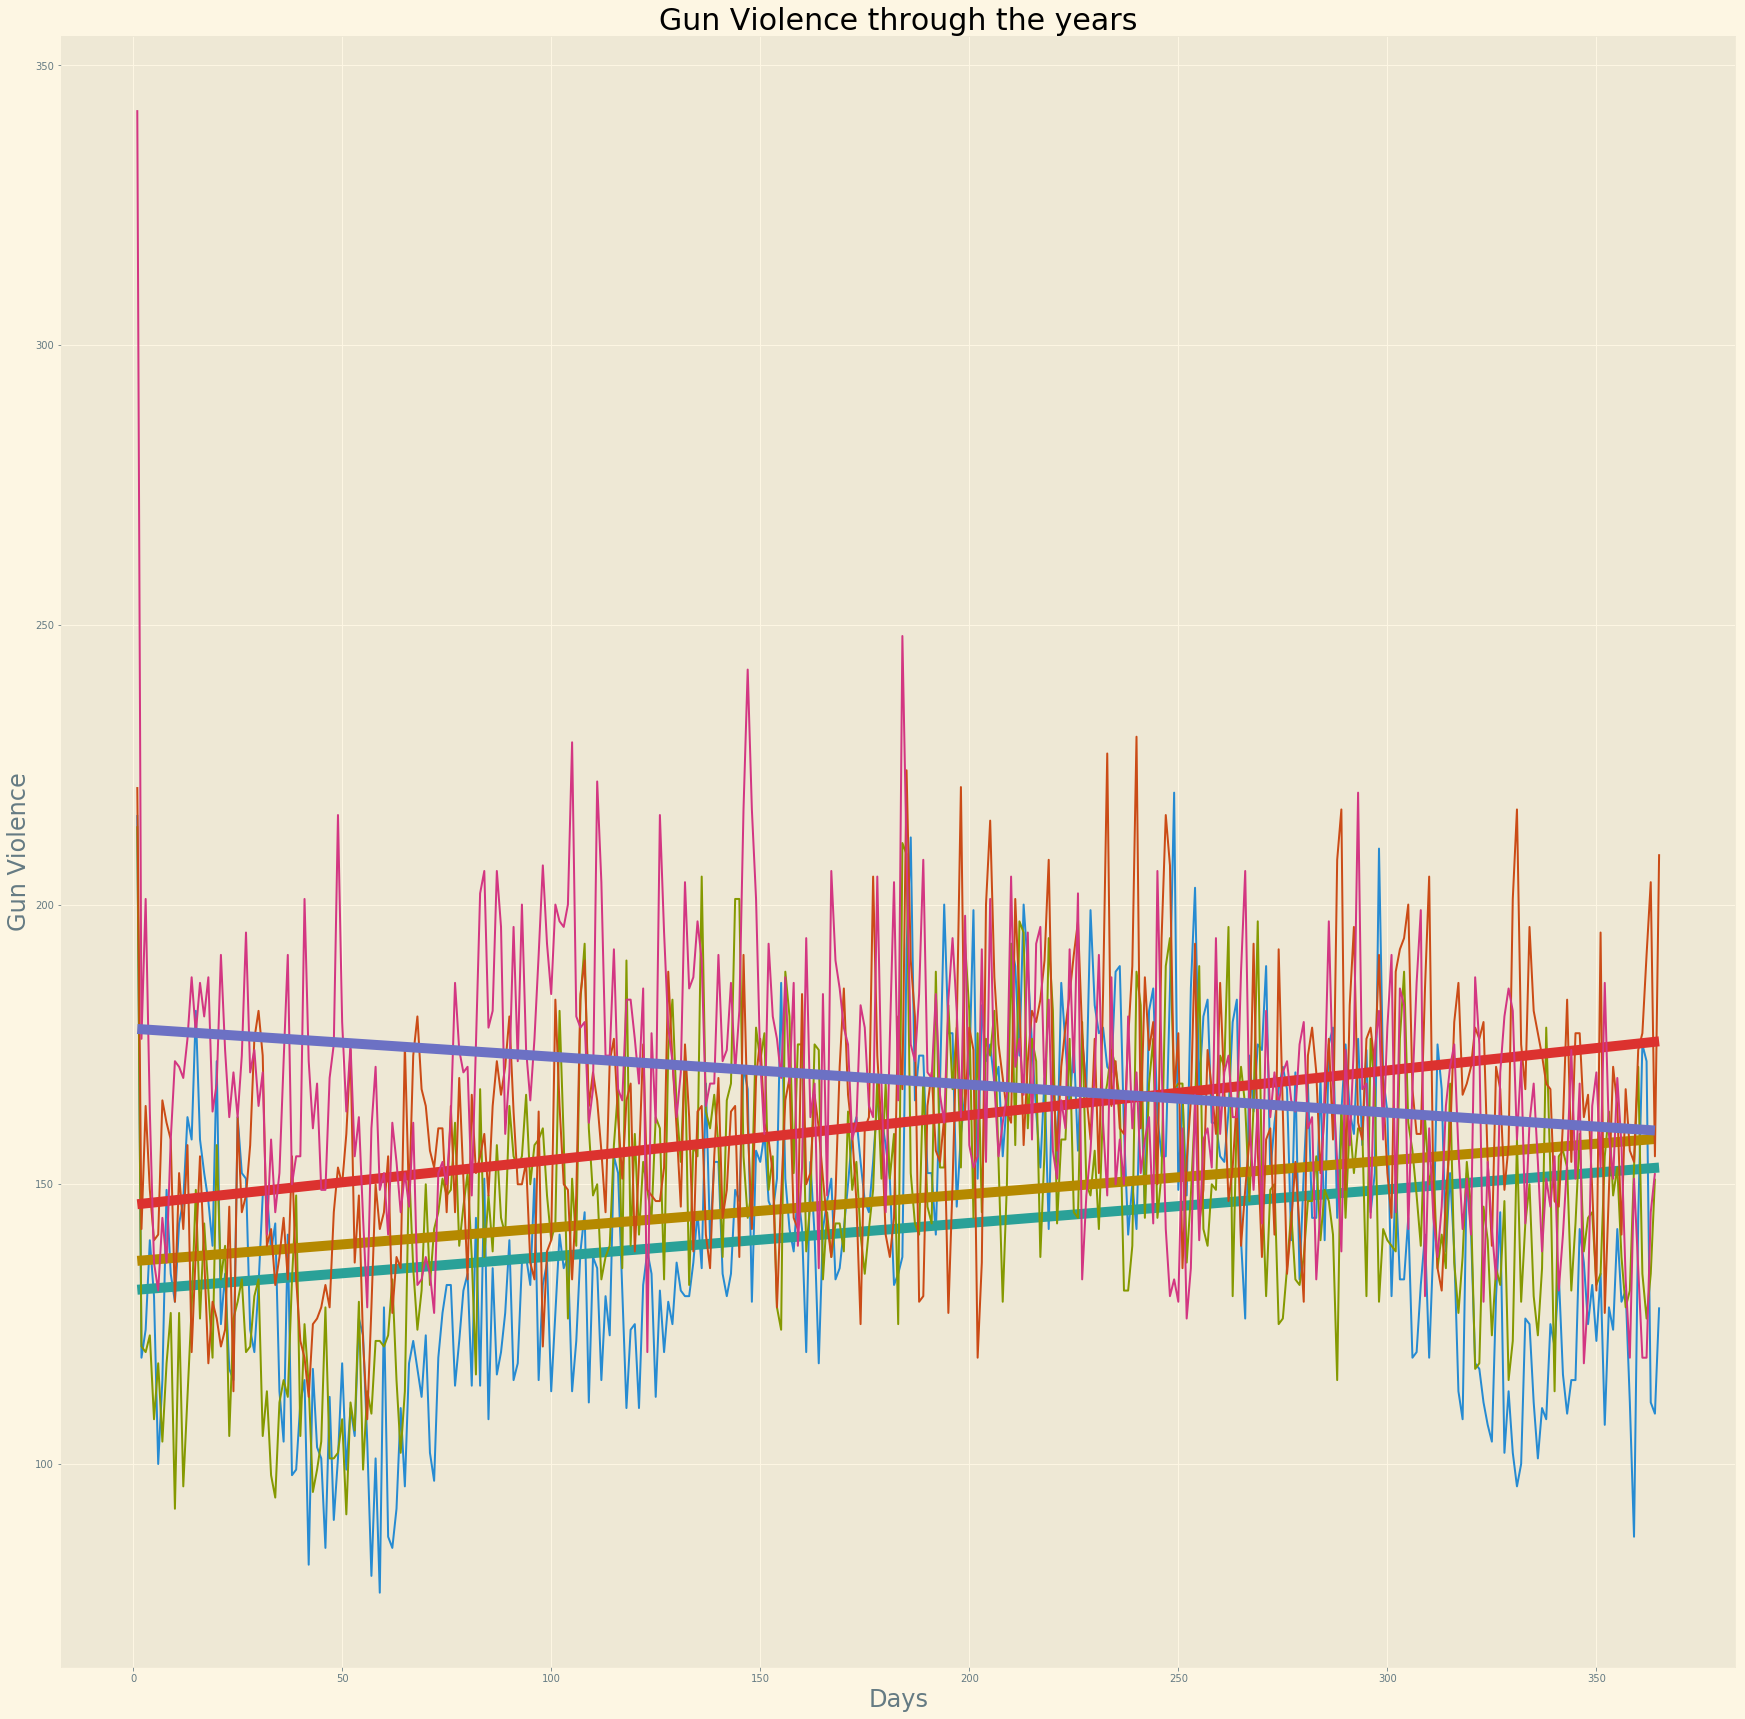

In [24]:
with plt.style.context('Solarize_Light2'):
    plt.figure(figsize=(30,30))
    i = 0
    for dictionary in list_of_dicts:
        plt.plot(dictionary.keys(), dictionary.values())
        plt.plot(dictionary.keys(), regression[i], linewidth=10)
        i += 1
    plt.title('Gun Violence through the years', fontsize=30)
    plt.xlabel('Days', fontsize=24)
    plt.ylabel('Gun Violence', fontsize=24)

plt.show()

In [25]:
x = list(date_violence.keys())
y = list(date_violence.values())


In [131]:
p1 = np.polyfit(x,y,7)
p2 = np.polyfit(x,y,8)
p3 = np.polyfit(x,y,10)

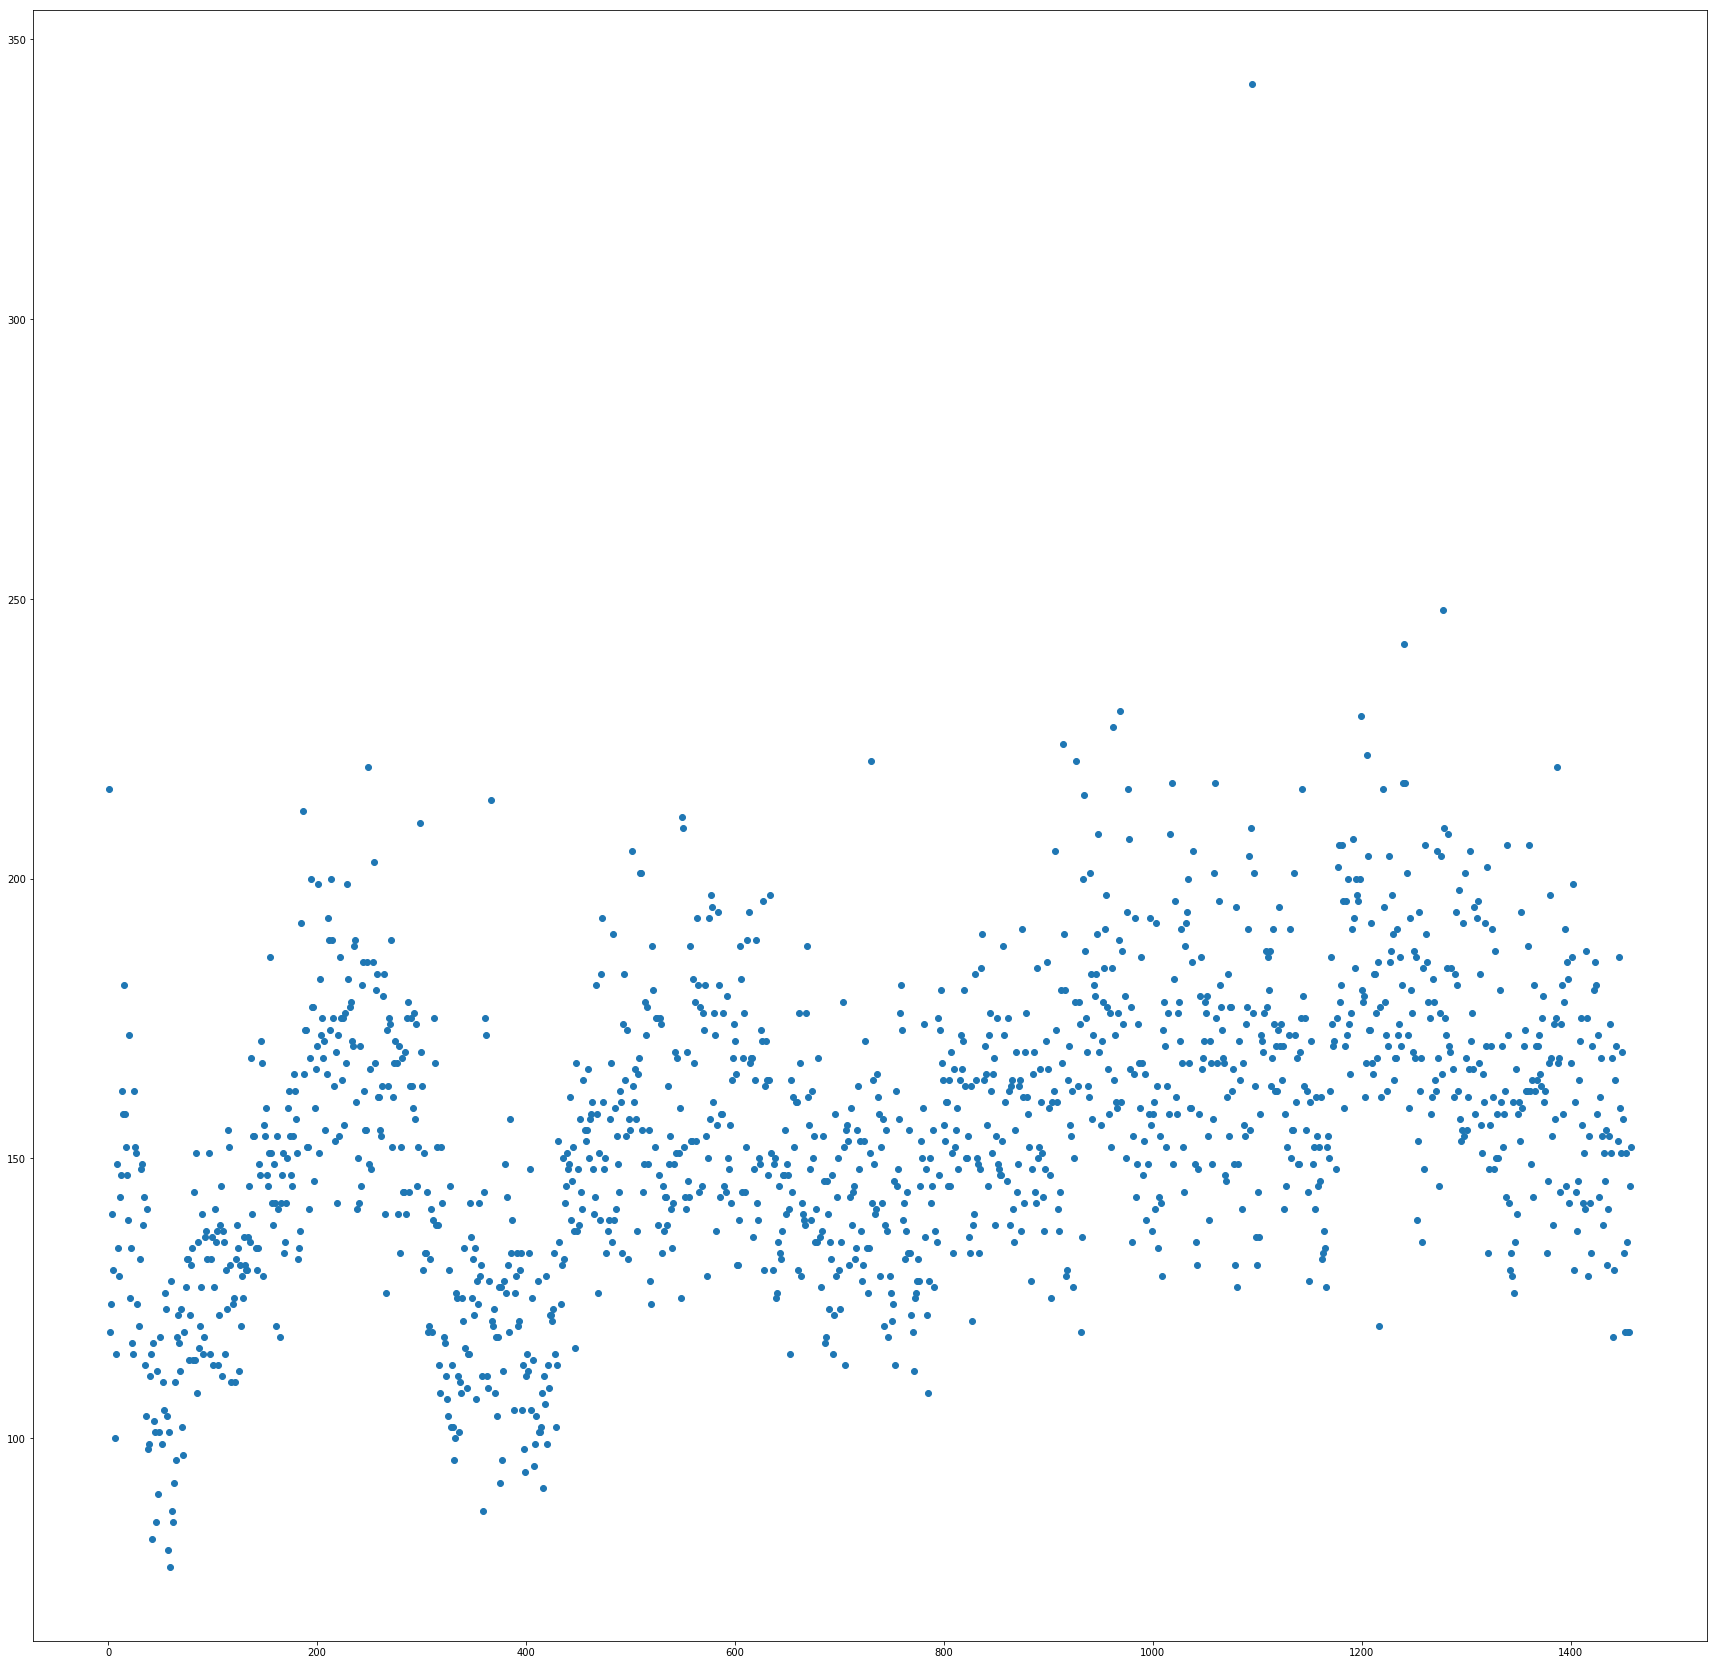

In [92]:
plt.figure(figsize=(30,30))
plt.plot(x,y,'o')

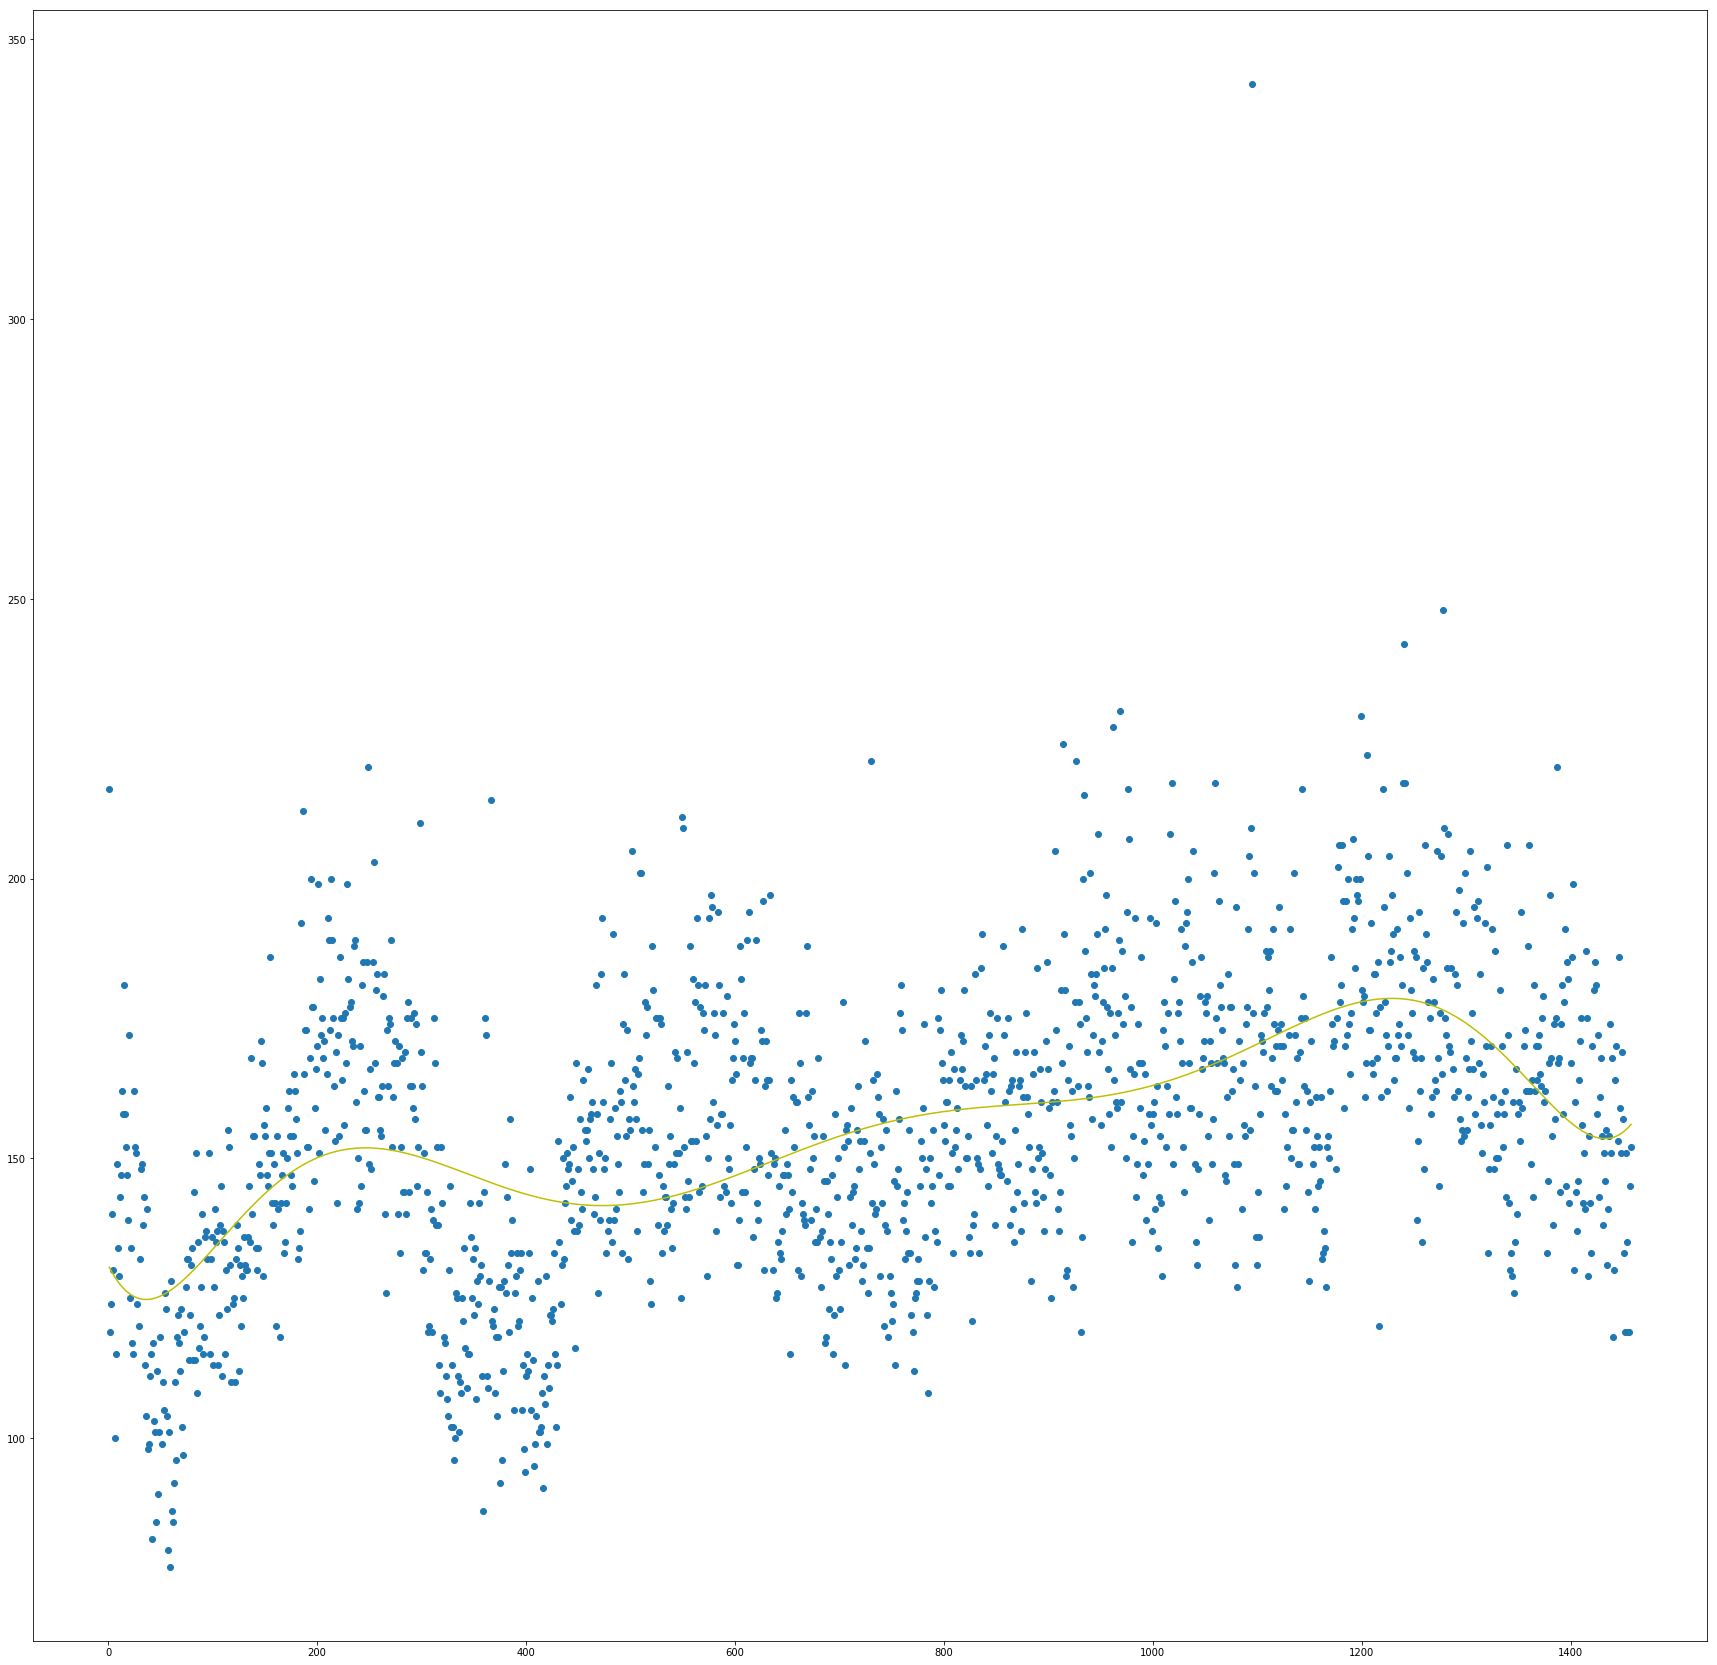

In [136]:
plt.figure(figsize=(30,30))
plt.plot(x,y,'o')
# plt.plot(x,np.polyval(p1,x),'r-')
plt.plot(x,np.polyval(p2,x),'y-')
# plt.plot(x,np.polyval(p3,x),'g-')

In [103]:
df2 = pd.read_csv('gun_laws.csv')
df3 = pd.read_csv('population_per_state_v2.csv')

In [126]:
df2.head(20)

,gun laws per state/year,2013,2014,2015,2016,2017
0,Alabama,10,10,10,10,10
1,Alaska,3,3,3,3,3
2,Arizona,8,8,8,8,8
3,Arkansas,11,11,11,11,11
4,California,99,100,102,106,106
5,Colorado,30,30,30,30,30
6,Connecticut,84,85,85,90,90
7,Delaware,37,38,38,40,40
8,Florida,21,21,21,21,21
9,Georgia,11,6,6,6,6
